# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [2]:
#conda update conda

In [21]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.22.3
Pandas version: 1.2.4
Seaborn version: 0.11.2
Matplotlib version: 3.5.1
Sklearn version: 0.23.1
Statsmodels version: 0.13.2


## Read the data from the '.csv' file as a monthly Time Series.

In [22]:
df = pd.read_excel('Indigodata.xlsx', parse_dates=True)
df.tail()

,Year,Quarter,Total income,Total Cost,Netprofit
24,2021,Q1,31703.0,63444.0,-31741.0
25,2021,Q2,57987.0,72344.0,-14357.0
26,2021,Q3,94801.0,93464.0,1337.0
27,2021,Q4,82075.0,98850.0,-16775.0
28,2022,Q1,130188.0,140831.0,-10643.0


In [23]:
date=pd.date_range(start='1/1/2015',end='4/1/2022',freq='Q')
date

DatetimeIndex(['2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [24]:
df['Time_Stamp'] = date
df.head()

,Year,Quarter,Total income,Total Cost,Netprofit,Time_Stamp
0,2015,Q1,43222.48,33993.29,9229.19,2015-03-31
1,2015,Q2,36387.33,34781.59,1605.74,2015-06-30
2,2015,Q3,44181.20,34958.34,9222.86,2015-09-30
3,2015,Q4,51419.90,45230.36,6189.54,2015-12-31
4,2016,Q1,47414.58,39947.62,7466.96,2016-03-31


In [25]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,Year,Quarter,Total income,Total Cost,Netprofit
Time_Stamp,,,,,
2015-03-31,2015,Q1,43222.48,33993.29,9229.19
2015-06-30,2015,Q2,36387.33,34781.59,1605.74
2015-09-30,2015,Q3,44181.20,34958.34,9222.86
2015-12-31,2015,Q4,51419.90,45230.36,6189.54
2016-03-31,2016,Q1,47414.58,39947.62,7466.96


In [26]:
df=pd.DataFrame(df['Netprofit'])

In [28]:
df.head()

,Netprofit
Time_Stamp,
2015-03-31,9229.19
2015-06-30,1605.74
2015-09-30,9222.86
2015-12-31,6189.54
2016-03-31,7466.96


In [7]:
df.set_index(keys='Time_Stamp',inplace=True)
df

,Sales_quantity
Time_Stamp,
2015-01-31,12729
2015-02-28,11636
2015-03-31,15922
2015-04-30,15227
2015-05-31,8620
...,...
2019-12-31,38069
2020-01-31,27184
2020-02-29,23509


## Plot the Time Series to understand the behaviour of the data.

In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

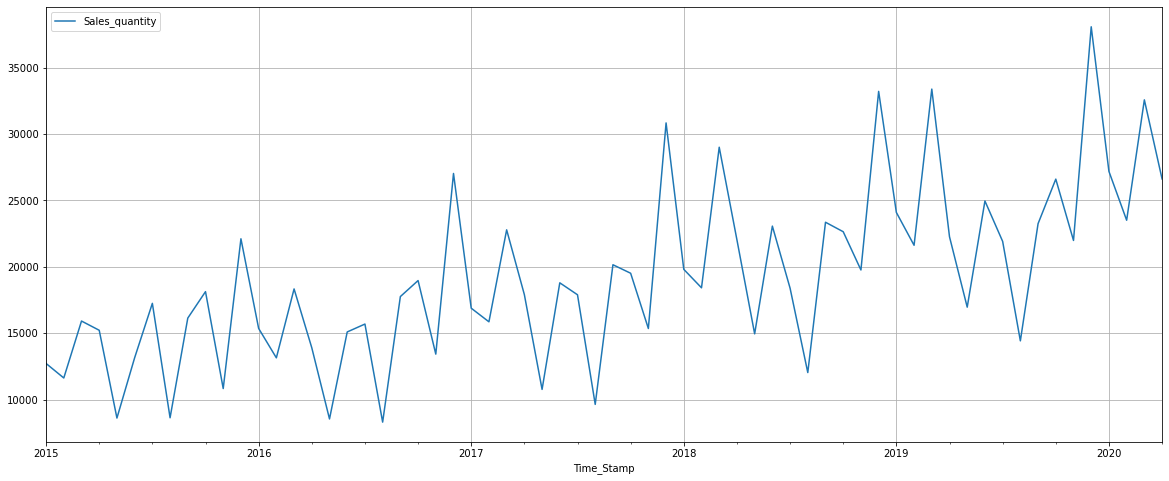

In [9]:
df.plot(grid=True);

We can see that there is a trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [10]:
df.describe()

,Sales_quantity
count,64.000000
mean,19197.375000
std,6591.287257
min,8314.000000
25%,15065.500000
50%,18368.000000
75%,22856.250000
max,38069.000000


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Decompose the Time Series and plot the different components.

In [11]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

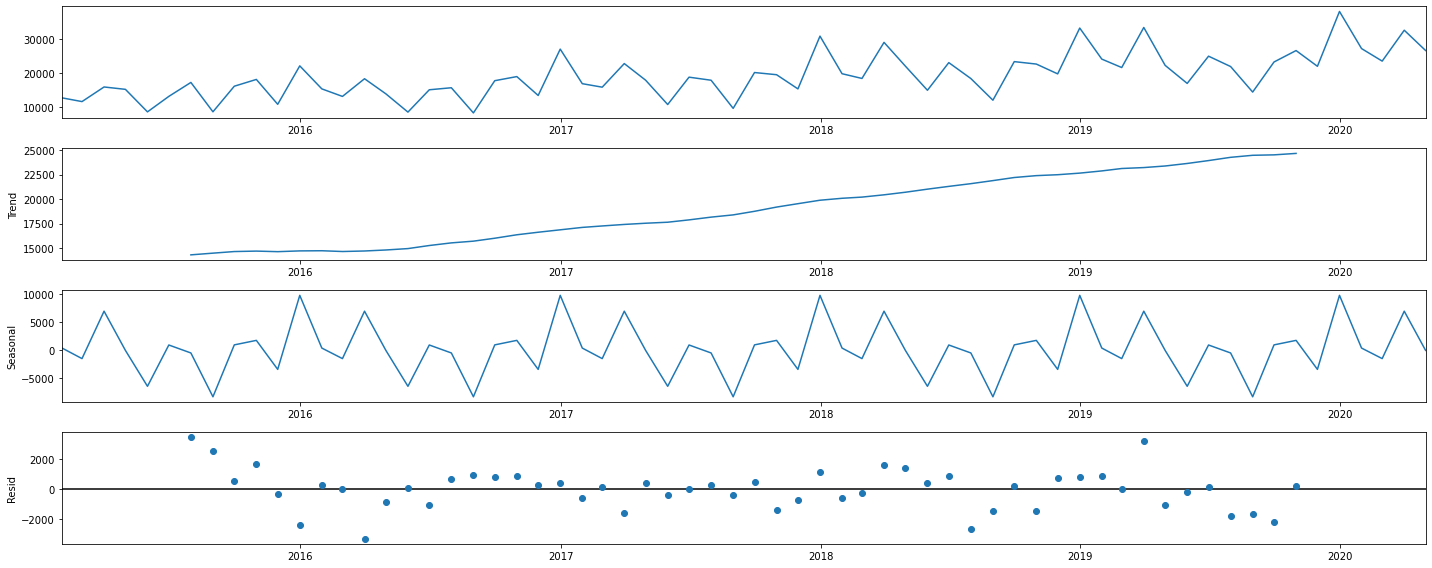

In [12]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

We see that the residuals have a pattern in this decomposition.

In [13]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2015-01-31             NaN
2015-02-28             NaN
2015-03-31             NaN
2015-04-30             NaN
2015-05-31             NaN
2015-06-30             NaN
2015-07-31    14311.750000
2015-08-31    14484.791667
2015-09-30    14648.708333
2015-10-31    14694.500000
2015-11-30    14636.791667
2015-12-31    14714.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2015-01-31     334.942708
2015-02-28   -1548.182292
2015-03-31    6928.213542
2015-04-30     -81.796875
2015-05-31   -6501.359375
2015-06-30     883.578125
2015-07-31    -540.938542
2015-08-31   -8376.538542
2015-09-30     905.194792
2015-10-31    1709.969792
2015-11-30   -3474.494792
2015-12-31    9761.411458
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2015-01-31            NaN
2015-02-28            NaN
2015-03-31            NaN
2015-04-30            NaN
2015-05-31            NaN
2015-06-30            NaN
2015-07-31    3483.188542
2015-08-31    2533.746875
2015-09-30     590.096875
2

### Multiplicative Decomposition

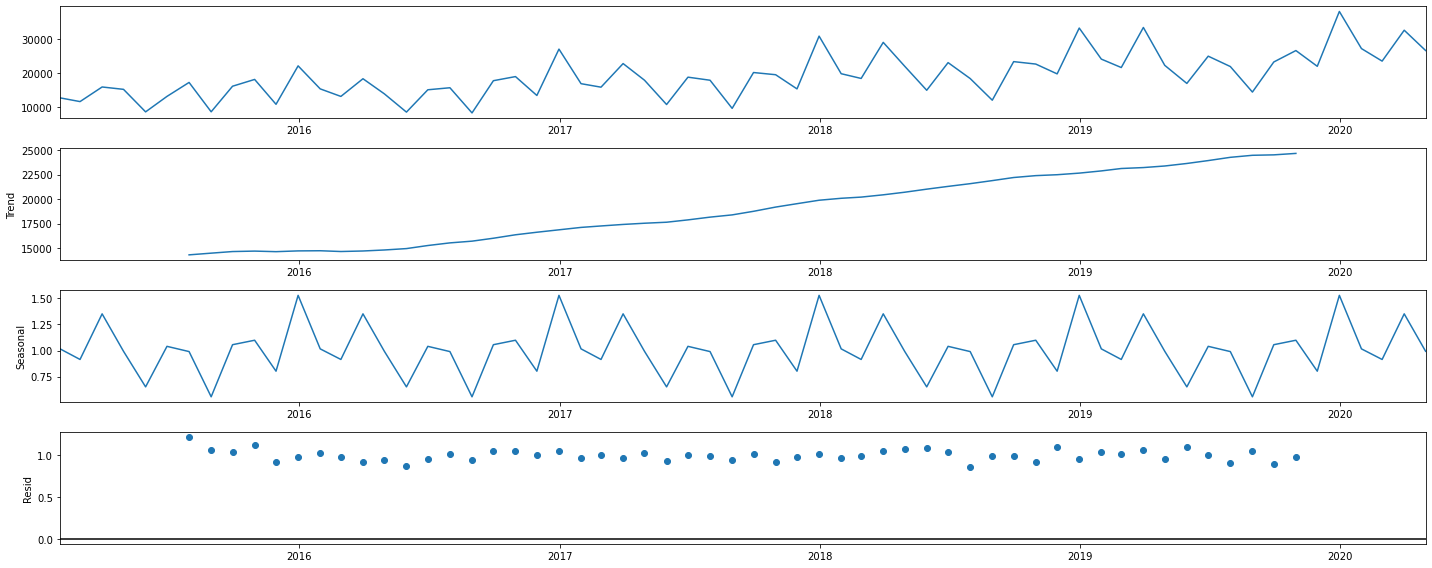

In [14]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [15]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2015-01-31             NaN
2015-02-28             NaN
2015-03-31             NaN
2015-04-30             NaN
2015-05-31             NaN
2015-06-30             NaN
2015-07-31    14311.750000
2015-08-31    14484.791667
2015-09-30    14648.708333
2015-10-31    14694.500000
2015-11-30    14636.791667
2015-12-31    14714.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2015-01-31    1.016014
2015-02-28    0.914684
2015-03-31    1.351165
2015-04-30    0.992906
2015-05-31    0.652248
2015-06-30    1.040221
2015-07-31    0.990120
2015-08-31    0.557343
2015-09-30    1.055952
2015-10-31    1.098610
2015-11-30    0.802419
2015-12-31    1.528319
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2015-01-31         NaN
2015-02-28         NaN
2015-03-31         NaN
2015-04-30         NaN
2015-05-31         NaN
2015-06-30         NaN
2015-07-31    1.217613
2015-08-31    1.070482
2015-09-30    1.043681
2015-10-31    1.123361
2015-11-30    0.923043
2015-12-31    0.98

For the multiplicative series, we see that a lot of residuals are located around 1.

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.449
DF test p-value is 0.001826283921732257
Number of lags used 0


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [38]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.750
DF test p-value is 0.0005716752394229384
Number of lags used 2


Now, let us go ahead and plot the stationary series.

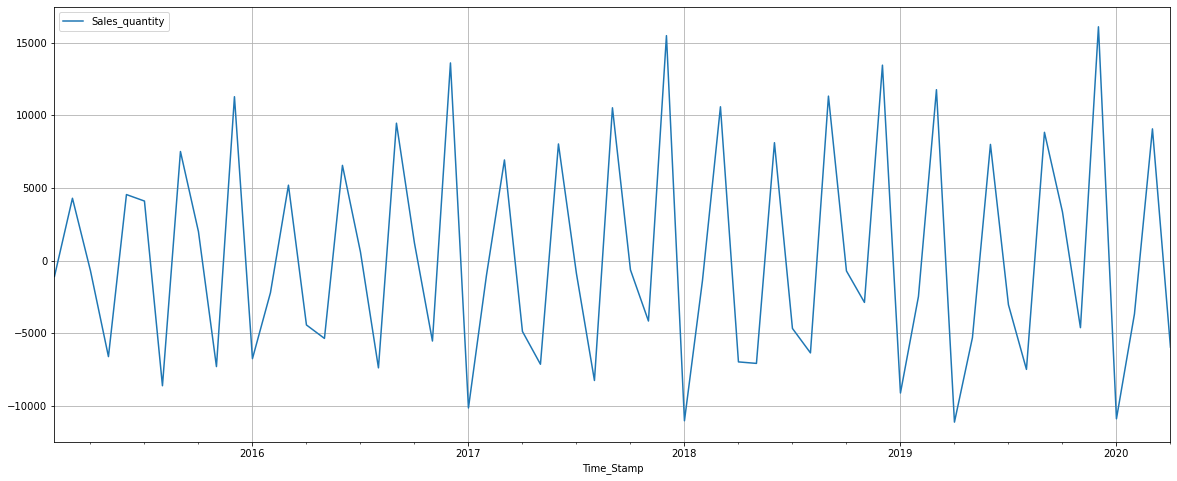

In [19]:
df.diff().dropna().plot(grid=True);

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

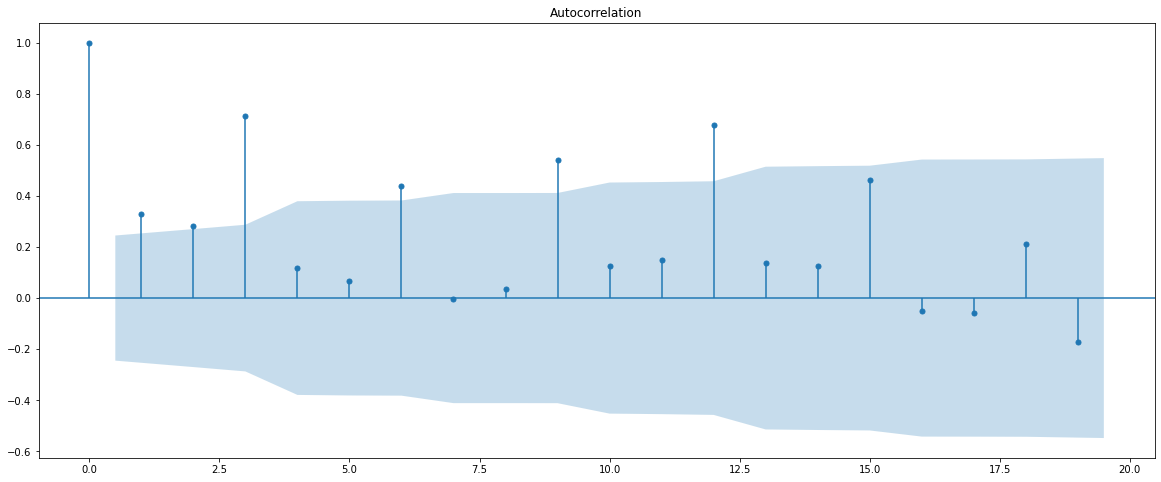

In [21]:
plot_acf(df,alpha=0.05);

From the above plots, we can say that there seems to be a seasonality in the data.

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


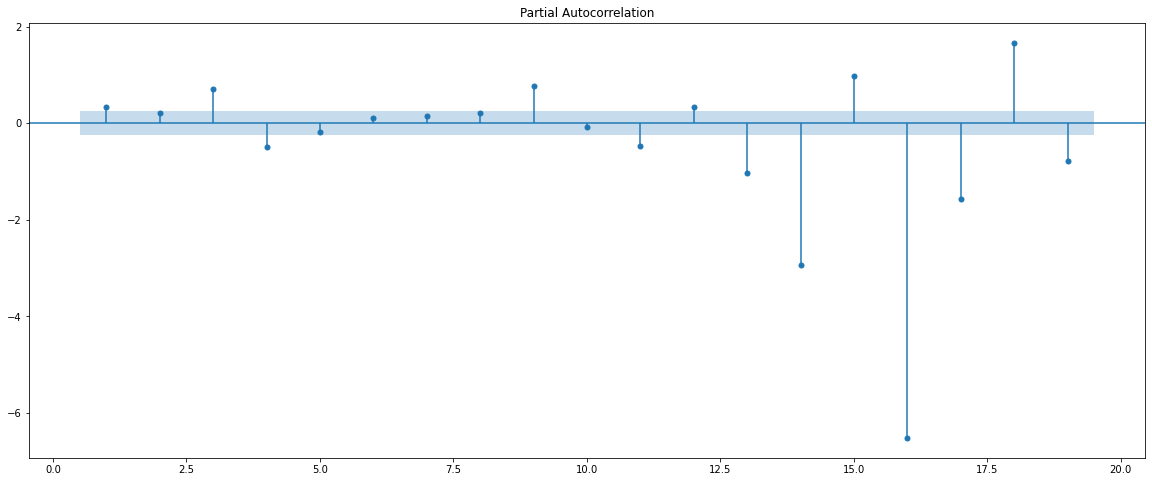

In [22]:
plot_pacf(df,zero=False,alpha=0.05);

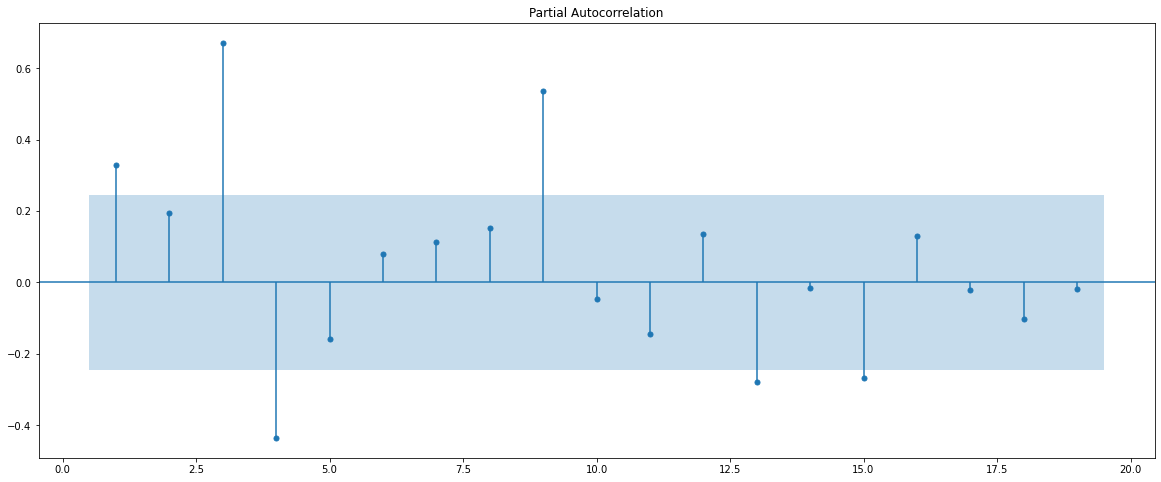

In [23]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2018. Test Data is from the beginning of 2019 to the last time stamp provided.

In [39]:
df.index.year.unique()

Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='Time_Stamp')

In [87]:
train = df[df.index<='2021'] 
test = df[df.index>'2021']

In [88]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [89]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Netprofit
Time_Stamp,
2015-03-31,9229.19
2015-06-30,1605.74
2015-09-30,9222.86
2015-12-31,6189.54
2016-03-31,7466.96


Last few rows of Training Data


,Netprofit
Time_Stamp,
2019-12-31,-12898.0
2020-03-31,-28426.0
2020-06-30,-11949.0
2020-09-30,-6231.0
2020-12-31,-11575.0


First few rows of Test Data


,Netprofit
Time_Stamp,
2021-03-31,-31741.0
2021-06-30,-14357.0
2021-09-30,1337.0
2021-12-31,-16775.0
2022-03-31,-10643.0


Last few rows of Test Data


,Netprofit
Time_Stamp,
2021-03-31,-31741.0
2021-06-30,-14357.0
2021-09-30,1337.0
2021-12-31,-16775.0
2022-03-31,-10643.0


In [90]:
print(train.shape)
print(test.shape)

(24, 1)
(5, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

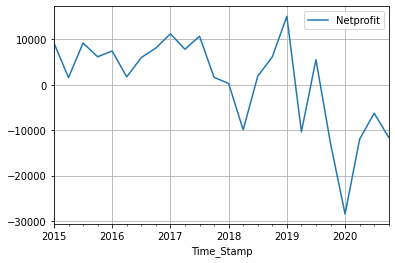

In [91]:
train.plot(grid=True);

In [92]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.173
DF test p-value is 0.0898203964213714
Number of lags used 9


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [117]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])
print('Number of lags used' ,dftest[3])

DF test statistic is -4.838
DF test p-value is 0.00040105787264059327
Number of lags used 6
Number of lags used 16


Now, let us go ahead and plot the differenced training data.

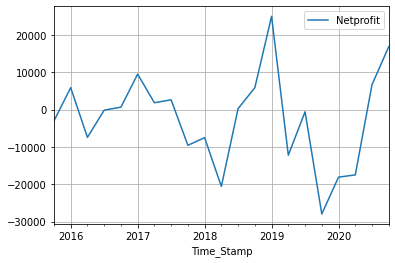

In [94]:
train.diff(3).dropna().plot(grid=True);

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2015-03-31 to 2020-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Netprofit  24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [120]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [121]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [122]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Netprofit'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:514.772923020536
ARIMA(0, 0, 1) - AIC:513.2617743068538
ARIMA(0, 0, 2) - AIC:514.2378495590046
ARIMA(0, 0, 3) - AIC:512.9951098766853
ARIMA(0, 1, 0) - AIC:492.41113021173476
ARIMA(0, 1, 1) - AIC:488.42285923239837
ARIMA(0, 1, 2) - AIC:491.31674302398204
ARIMA(0, 1, 3) - AIC:494.73495568276803
ARIMA(1, 0, 0) - AIC:510.8108554683157
ARIMA(1, 0, 1) - AIC:512.0322204359129
ARIMA(1, 0, 2) - AIC:514.6862551051101
ARIMA(1, 0, 3) - AIC:514.8372306923939
ARIMA(1, 1, 0) - AIC:489.82451952199085
ARIMA(1, 1, 1) - AIC:490.28920091039214


C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:492.8323194094433
ARIMA(1, 1, 3) - AIC:496.68041162557404
ARIMA(2, 0, 0) - AIC:511.83373648428557
ARIMA(2, 0, 1) - AIC:513.9527162924378
ARIMA(2, 0, 2) - AIC:515.2503773456772
ARIMA(2, 0, 3) - AIC:515.7742411516874
ARIMA(2, 1, 0) - AIC:491.19919124203534
ARIMA(2, 1, 1) - AIC:492.17617472542065


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:492.1057344253717
ARIMA(2, 1, 3) - AIC:496.0139079688671
ARIMA(3, 0, 0) - AIC:513.8394725887497
ARIMA(3, 0, 1) - AIC:515.941082184749
ARIMA(3, 0, 2) - AIC:515.0173741222222
ARIMA(3, 0, 3) - AIC:516.8155775945008
ARIMA(3, 1, 0) - AIC:492.8092882713744
ARIMA(3, 1, 1) - AIC:494.105753084527
ARIMA(3, 1, 2) - AIC:494.17119391632934
ARIMA(3, 1, 3) - AIC:496.2832313423291


In [124]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",488.422859
12,"(1, 1, 0)",489.824520
13,"(1, 1, 1)",490.289201
20,"(2, 1, 0)",491.199191
6,"(0, 1, 2)",491.316743


In [126]:
auto_ARIMA = ARIMA(train, order=(0,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Netprofit   No. Observations:                   24
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -242.211
Date:                Sun, 28 Aug 2022   AIC                            488.423
Time:                        12:45:55   BIC                            490.694
Sample:                    03-31-2015   HQIC                           488.994
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6130      0.195     -3.149      0.002      -0.995      -0.231
sigma2      9.814e+07   7.31e-10   1.34e+17      0.000    9.81e+07    9.81e+07
Ljung-Box (L1) (Q):                   0.01   Jarque-

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


Diagnostics plot.

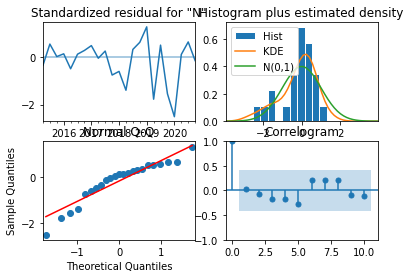

In [127]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [128]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [129]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [130]:
rmse = mean_squared_error(test['Netprofit'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Netprofit'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 11287.375921606788 
MAPE: 154.7387340251457


In [131]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(1,3,3)'])

resultsDf

,RMSE,MAPE
"ARIMA(1,3,3)",11287.375922,154.738734


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

In [132]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

NameError: name 'plot_acf' is not defined

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [133]:
manual_ARIMA = ARIMA(train['Netprofit'], order=(3,1,2),freq='Q')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Netprofit   No. Observations:                   24
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -241.086
Date:                Sun, 28 Aug 2022   AIC                            494.171
Time:                        12:48:47   BIC                            500.984
Sample:                    03-31-2015   HQIC                           495.885
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7355      0.727     -1.011      0.312      -2.161       0.690
ar.L2          0.2203      0.986      0.223      0.823      -1.712       2.153
ar.L3         -0.0434      0.460     -0.094      0.9

Let us analyse the residuals from the various diagnostics plot.

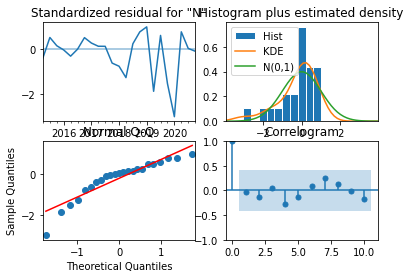

In [113]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [114]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [116]:
rmse = mean_squared_error(test['Netprofit'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Netprofit'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 11927.08023762092 
MAPE: 99.30441965803449


In [49]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [134]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

NameError: name 'plot_acf' is not defined

We can see that there is a seasonality.

In [135]:
import itertools
p = q = range(0, 4)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 6)
Model: (0, 0, 2)(0, 0, 2, 6)
Model: (0, 0, 3)(0, 0, 3, 6)
Model: (0, 1, 0)(0, 1, 0, 6)
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 0, 0)(1, 0, 0, 6)
Model: (1, 0, 1)(1, 0, 1, 6)
Model: (1, 0, 2)(1, 0, 2, 6)
Model: (1, 0, 3)(1, 0, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 0, 0)(2, 0, 0, 6)
Model: (2, 0, 1)(2, 0, 1, 6)
Model: (2, 0, 2)(2, 0, 2, 6)
Model: (2, 0, 3)(2, 0, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 0, 0)(3, 0, 0, 6)
Model: (3, 0, 1)(3, 0, 1, 6)
Model: (3, 0, 2)(3, 0, 2, 6)
Model: (3, 0, 3)(3, 0, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [136]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [137]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Netprofit'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:491.801944762327


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:688.9660293348043
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:243.73416347977198
SARIMA(0, 0, 0)x(0, 0, 3, 6) - AIC:101.59986929983353
SARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:369.391800940329
SARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:241.57585213545306
SARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:109.84035343838109
SARIMA(0, 0, 0)x(0, 1, 3, 6) - AIC:8.0
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:388.66812810394754


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:591.42375308437
SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:241.17757089568073
SARIMA(0, 0, 0)x(1, 0, 3, 6) - AIC:103.08414662040346
SARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:266.98801810250535
SARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:251.85002473746925
SARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:104.27728932253264
SARIMA(0, 0, 0)x(1, 1, 3, 6) - AIC:10.0
SARIMA(0, 0, 0)x(2, 0, 0, 6) - AIC:260.96811290102994
SARIMA(0, 0, 0)x(2, 0, 1, 6) - AIC:942.5444220730435
SARIMA(0, 0, 0)x(2, 0, 2, 6) - AIC:238.60307475719958
SARIMA(0, 0, 0)x(2, 0, 3, 6) - AIC:113.12560308520267
SARIMA(0, 0, 0)x(2, 1, 0, 6) - AIC:137.63204927518763
SARIMA(0, 0, 0)x(2, 1, 1, 6) - AIC:131.26472040143585
SARIMA(0, 0, 0)x(2, 1, 2, 6) - AIC:112.42732189939551
SARIMA(0, 0, 0)x(2, 1, 3, 6) - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 0, 6) - AIC:132.85494085725887


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(3, 0, 1, 6) - AIC:204.55260435555545
SARIMA(0, 0, 0)x(3, 0, 2, 6) - AIC:134.2507674696446
SARIMA(0, 0, 0)x(3, 0, 3, 6) - AIC:104.65203300680135
SARIMA(0, 0, 0)x(3, 1, 0, 6) - AIC:8.0
SARIMA(0, 0, 0)x(3, 1, 1, 6) - AIC:10.0
SARIMA(0, 0, 0)x(3, 1, 2, 6) - AIC:12.0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /


SARIMA(0, 0, 0)x(3, 1, 3, 6) - AIC:14.0
SARIMA(0, 0, 1)x(0, 0, 0, 6) - AIC:469.7057085126227
SARIMA(0, 0, 1)x(0, 0, 1, 6) - AIC:1297.5104861556595
SARIMA(0, 0, 1)x(0, 0, 2, 6) - AIC:215.72005146783894
SARIMA(0, 0, 1)x(0, 0, 3, 6) - AIC:92.83478084560488
SARIMA(0, 0, 1)x(0, 1, 0, 6) - AIC:346.6964749781949
SARIMA(0, 0, 1)x(0, 1, 1, 6) - AIC:220.97872778969474
SARIMA(0, 0, 1)x(0, 1, 2, 6) - AIC:91.47483831877466
SARIMA(0, 0, 1)x(0, 1, 3, 6) - AIC:10.0
SARIMA(0, 0, 1)x(1, 0, 0, 6) - AIC:387.0279886964176


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(1, 0, 1, 6) - AIC:1238.78386456616
SARIMA(0, 0, 1)x(1, 0, 2, 6) - AIC:221.5578837502302
SARIMA(0, 0, 1)x(1, 0, 3, 6) - AIC:93.3412891870792
SARIMA(0, 0, 1)x(1, 1, 0, 6) - AIC:265.89688819578515
SARIMA(0, 0, 1)x(1, 1, 1, 6) - AIC:220.37460861908704
SARIMA(0, 0, 1)x(1, 1, 2, 6) - AIC:93.27212038726904
SARIMA(0, 0, 1)x(1, 1, 3, 6) - AIC:12.0
SARIMA(0, 0, 1)x(2, 0, 0, 6) - AIC:262.8558284754017
SARIMA(0, 0, 1)x(2, 0, 1, 6) - AIC:958.3874280626117
SARIMA(0, 0, 1)x(2, 0, 2, 6) - AIC:217.0447902845198
SARIMA(0, 0, 1)x(2, 0, 3, 6) - AIC:82.14446528244926
SARIMA(0, 0, 1)x(2, 1, 0, 6) - AIC:138.69403672325006
SARIMA(0, 0, 1)x(2, 1, 1, 6) - AIC:129.64768870675948
SARIMA(0, 0, 1)x(2, 1, 2, 6) - AIC:95.1818477685174
SARIMA(0, 0, 1)x(2, 1, 3, 6) - AIC:14.0
SARIMA(0, 0, 1)x(3, 0, 0, 6) - AIC:135.26599728511863


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(3, 0, 1, 6) - AIC:251.67486773421444
SARIMA(0, 0, 1)x(3, 0, 2, 6) - AIC:135.94861794731963
SARIMA(0, 0, 1)x(3, 0, 3, 6) - AIC:97.09901570097436
SARIMA(0, 0, 1)x(3, 1, 0, 6) - AIC:10.0
SARIMA(0, 0, 1)x(3, 1, 1, 6) - AIC:12.0
SARIMA(0, 0, 1)x(3, 1, 2, 6) - AIC:14.0
SARIMA(0, 0, 1)x(3, 1, 3, 6) - AIC:16.0
SARIMA(0, 0, 2)x(0, 0, 0, 6) - AIC:449.673070132824


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(0, 0, 1, 6) - AIC:1109.5182063181435
SARIMA(0, 0, 2)x(0, 0, 2, 6) - AIC:195.98045203623127
SARIMA(0, 0, 2)x(0, 0, 3, 6) - AIC:61.9246112364477
SARIMA(0, 0, 2)x(0, 1, 0, 6) - AIC:327.77918049657234
SARIMA(0, 0, 2)x(0, 1, 1, 6) - AIC:201.73724734012833
SARIMA(0, 0, 2)x(0, 1, 2, 6) - AIC:71.96310960619027
SARIMA(0, 0, 2)x(0, 1, 3, 6) - AIC:12.0
SARIMA(0, 0, 2)x(1, 0, 0, 6) - AIC:388.6294181233844


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(1, 0, 1, 6) - AIC:1106.0662823264433
SARIMA(0, 0, 2)x(1, 0, 2, 6) - AIC:202.54977493027735
SARIMA(0, 0, 2)x(1, 0, 3, 6) - AIC:74.95432741530715
SARIMA(0, 0, 2)x(1, 1, 0, 6) - AIC:267.422065778883
SARIMA(0, 0, 2)x(1, 1, 1, 6) - AIC:201.1932568253783
SARIMA(0, 0, 2)x(1, 1, 2, 6) - AIC:73.96310513836772
SARIMA(0, 0, 2)x(1, 1, 3, 6) - AIC:14.0
SARIMA(0, 0, 2)x(2, 0, 0, 6) - AIC:264.04663349487
SARIMA(0, 0, 2)x(2, 0, 1, 6) - AIC:960.8198573813224
SARIMA(0, 0, 2)x(2, 0, 2, 6) - AIC:198.8364173522025
SARIMA(0, 0, 2)x(2, 0, 3, 6) - AIC:60.845550005890274
SARIMA(0, 0, 2)x(2, 1, 0, 6) - AIC:139.8674788789442
SARIMA(0, 0, 2)x(2, 1, 1, 6) - AIC:136.81654521776508
SARIMA(0, 0, 2)x(2, 1, 2, 6) - AIC:75.96309803013227
SARIMA(0, 0, 2)x(2, 1, 3, 6) - AIC:16.0
SARIMA(0, 0, 2)x(3, 0, 0, 6) - AIC:134.46490661887978


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(3, 0, 1, 6) - AIC:273.66684600485195
SARIMA(0, 0, 2)x(3, 0, 2, 6) - AIC:138.34338626286092
SARIMA(0, 0, 2)x(3, 0, 3, 6) - AIC:78.78178911686774
SARIMA(0, 0, 2)x(3, 1, 0, 6) - AIC:12.0
SARIMA(0, 0, 2)x(3, 1, 1, 6) - AIC:14.0
SARIMA(0, 0, 2)x(3, 1, 2, 6) - AIC:16.0
SARIMA(0, 0, 2)x(3, 1, 3, 6) - AIC:18.0
SARIMA(0, 0, 3)x(0, 0, 0, 6) - AIC:427.73313033504337
SARIMA(0, 0, 3)x(0, 0, 1, 6) - AIC:980.3022478714666
SARIMA(0, 0, 3)x(0, 0, 2, 6) - AIC:179.85453423753458
SARIMA(0, 0, 3)x(0, 0, 3, 6) - AIC:54.56055307886342
SARIMA(0, 0, 3)x(0, 1, 0, 6) - AIC:308.2972270742466
SARIMA(0, 0, 3)x(0, 1, 1, 6) - AIC:180.98537591499033
SARIMA(0, 0, 3)x(0, 1, 2, 6) - AIC:54.07351631007724
SARIMA(0, 0, 3)x(0, 1, 3, 6) - AIC:14.0
SARIMA(0, 0, 3)x(1, 0, 0, 6) - AIC:386.84911486684587


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(1, 0, 1, 6) - AIC:1048.0699432168244
SARIMA(0, 0, 3)x(1, 0, 2, 6) - AIC:179.77631929417288
SARIMA(0, 0, 3)x(1, 0, 3, 6) - AIC:56.55677981875791
SARIMA(0, 0, 3)x(1, 1, 0, 6) - AIC:267.1570080703726
SARIMA(0, 0, 3)x(1, 1, 1, 6) - AIC:182.2496000635022
SARIMA(0, 0, 3)x(1, 1, 2, 6) - AIC:56.073397670844315
SARIMA(0, 0, 3)x(1, 1, 3, 6) - AIC:16.0
SARIMA(0, 0, 3)x(2, 0, 0, 6) - AIC:262.3502049228316
SARIMA(0, 0, 3)x(2, 0, 1, 6) - AIC:962.2566630122335
SARIMA(0, 0, 3)x(2, 0, 2, 6) - AIC:180.57712703048293
SARIMA(0, 0, 3)x(2, 0, 3, 6) - AIC:58.53036303031381
SARIMA(0, 0, 3)x(2, 1, 0, 6) - AIC:138.93071506460285
SARIMA(0, 0, 3)x(2, 1, 1, 6) - AIC:127.21581868312232
SARIMA(0, 0, 3)x(2, 1, 2, 6) - AIC:58.07339813829297
SARIMA(0, 0, 3)x(2, 1, 3, 6) - AIC:18.0
SARIMA(0, 0, 3)x(3, 0, 0, 6) - AIC:135.68218547108788


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(3, 0, 1, 6) - AIC:245.54044410767807
SARIMA(0, 0, 3)x(3, 0, 2, 6) - AIC:139.65789932109496
SARIMA(0, 0, 3)x(3, 0, 3, 6) - AIC:60.52573026443534
SARIMA(0, 0, 3)x(3, 1, 0, 6) - AIC:14.0
SARIMA(0, 0, 3)x(3, 1, 1, 6) - AIC:16.0
SARIMA(0, 0, 3)x(3, 1, 2, 6) - AIC:18.0
SARIMA(0, 0, 3)x(3, 1, 3, 6) - AIC:20.0
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:471.56282996219403
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:610.4582705650187
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:224.1761439904436
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:89.31831118071928
SARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:348.2158452012193
SARIMA(0, 1, 0)x(0, 1, 1, 6) - AIC:222.51082220509255
SARIMA(0, 1, 0)x(0, 1, 2, 6) - AIC:91.222344960792
SARIMA(0, 1, 0)x(0, 1, 3, 6) - AIC:8.0
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:368.3434654009988
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1440.3459703580515
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:225.94808547771416
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:84.2473673084014
SARIMA(0, 1, 0)x(1, 1, 0, 6) - AIC:243.32216664914273
SA

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:468.9093319865159
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:225.05154741730354
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:77.52592859231022
SARIMA(0, 1, 0)x(2, 1, 0, 6) - AIC:115.92486771150057
SARIMA(0, 1, 0)x(2, 1, 1, 6) - AIC:113.47320736382468
SARIMA(0, 1, 0)x(2, 1, 2, 6) - AIC:93.34495613142458
SARIMA(0, 1, 0)x(2, 1, 3, 6) - AIC:12.0
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:110.99449276933325


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:202.08870561687527
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:115.81045906889601
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:75.42292585052513
SARIMA(0, 1, 0)x(3, 1, 0, 6) - AIC:8.0
SARIMA(0, 1, 0)x(3, 1, 1, 6) - AIC:10.0
SARIMA(0, 1, 0)x(3, 1, 2, 6) - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 3, 6) - AIC:14.0
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:447.38507455964094
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1087.7110934858824


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:201.97404287838862
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:62.6519579813858
SARIMA(0, 1, 1)x(0, 1, 0, 6) - AIC:326.0307133222663
SARIMA(0, 1, 1)x(0, 1, 1, 6) - AIC:202.01616539065273
SARIMA(0, 1, 1)x(0, 1, 2, 6) - AIC:70.15187805693702
SARIMA(0, 1, 1)x(0, 1, 3, 6) - AIC:10.0
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:366.33442986618587


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1123.1793914577333
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:201.56351207496922
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:60.01200698866208
SARIMA(0, 1, 1)x(1, 1, 0, 6) - AIC:243.8978443028317
SARIMA(0, 1, 1)x(1, 1, 1, 6) - AIC:201.51408622225415
SARIMA(0, 1, 1)x(1, 1, 2, 6) - AIC:72.06748472703816
SARIMA(0, 1, 1)x(1, 1, 3, 6) - AIC:12.0
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:245.67588755804073


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:372.2975684341352
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:200.7414713292739
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:60.02336377585273
SARIMA(0, 1, 1)x(2, 1, 0, 6) - AIC:117.40848668645522
SARIMA(0, 1, 1)x(2, 1, 1, 6) - AIC:115.75565952952127
SARIMA(0, 1, 1)x(2, 1, 2, 6) - AIC:74.05281753903554
SARIMA(0, 1, 1)x(2, 1, 3, 6) - AIC:14.0
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:113.01934396066113


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:170.8287118505053
SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:116.50651647643423
SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:76.70255436795213
SARIMA(0, 1, 1)x(3, 1, 0, 6) - AIC:10.0
SARIMA(0, 1, 1)x(3, 1, 1, 6) - AIC:12.0
SARIMA(0, 1, 1)x(3, 1, 2, 6) - AIC:14.0
SARIMA(0, 1, 1)x(3, 1, 3, 6) - AIC:16.0
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:429.4657495262502


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1014.0503432921048
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:182.030942242937
SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:52.82021065969099
SARIMA(0, 1, 2)x(0, 1, 0, 6) - AIC:306.9164488475961
SARIMA(0, 1, 2)x(0, 1, 1, 6) - AIC:182.0094140908209
SARIMA(0, 1, 2)x(0, 1, 2, 6) - AIC:51.33735581488192
SARIMA(0, 1, 2)x(0, 1, 3, 6) - AIC:12.0
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:368.26634679094633


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1213.5372505971013
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:180.91675291514102
SARIMA(0, 1, 2)x(1, 0, 3, 6) - AIC:54.82013993057234
SARIMA(0, 1, 2)x(1, 1, 0, 6) - AIC:245.36117959466236
SARIMA(0, 1, 2)x(1, 1, 1, 6) - AIC:182.416928784087
SARIMA(0, 1, 2)x(1, 1, 2, 6) - AIC:53.31956838260227
SARIMA(0, 1, 2)x(1, 1, 3, 6) - AIC:14.0
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:247.04295840955544


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:393.5353461275556
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:180.54608801959654
SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:56.807930018758654
SARIMA(0, 1, 2)x(2, 1, 0, 6) - AIC:116.66523942178435
SARIMA(0, 1, 2)x(2, 1, 1, 6) - AIC:117.12959157342004
SARIMA(0, 1, 2)x(2, 1, 2, 6) - AIC:55.31958044035207
SARIMA(0, 1, 2)x(2, 1, 3, 6) - AIC:16.0
SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:114.26821906974072


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 1, 6) - AIC:214.84845052110964
SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:118.25856474358744
SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:58.75792434828248
SARIMA(0, 1, 2)x(3, 1, 0, 6) - AIC:12.0
SARIMA(0, 1, 2)x(3, 1, 1, 6) - AIC:14.0
SARIMA(0, 1, 2)x(3, 1, 2, 6) - AIC:16.0
SARIMA(0, 1, 2)x(3, 1, 3, 6) - AIC:18.0
SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:411.89907647217956


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:776.8948060332533
SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:161.01751588795798
SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:34.58685338977215
SARIMA(0, 1, 3)x(0, 1, 0, 6) - AIC:294.88982118601797
SARIMA(0, 1, 3)x(0, 1, 1, 6) - AIC:164.3118016756929
SARIMA(0, 1, 3)x(0, 1, 2, 6) - AIC:33.055137390290625
SARIMA(0, 1, 3)x(0, 1, 3, 6) - AIC:14.0
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:371.11797787883813


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:1050.694031223498
SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:162.01266716880144
SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:36.58682079898264
SARIMA(0, 1, 3)x(1, 1, 0, 6) - AIC:248.39786428906504
SARIMA(0, 1, 3)x(1, 1, 1, 6) - AIC:163.11427529513688
SARIMA(0, 1, 3)x(1, 1, 2, 6) - AIC:35.055472436860924
SARIMA(0, 1, 3)x(1, 1, 3, 6) - AIC:16.0
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:248.9492117595334


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:407.2356352360199
SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:161.20275512168146
SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:38.58687202265024
SARIMA(0, 1, 3)x(2, 1, 0, 6) - AIC:118.91170234194789
SARIMA(0, 1, 3)x(2, 1, 1, 6) - AIC:120.66382358978056
SARIMA(0, 1, 3)x(2, 1, 2, 6) - AIC:37.05505685563875
SARIMA(0, 1, 3)x(2, 1, 3, 6) - AIC:18.0
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:117.02505671178744


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:204.70844973184327
SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:120.99207736024492
SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:40.58687105081684
SARIMA(0, 1, 3)x(3, 1, 0, 6) - AIC:14.0
SARIMA(0, 1, 3)x(3, 1, 1, 6) - AIC:16.0
SARIMA(0, 1, 3)x(3, 1, 2, 6) - AIC:18.0
SARIMA(0, 1, 3)x(3, 1, 3, 6) - AIC:20.0
SARIMA(1, 0, 0)x(0, 0, 0, 6) - AIC:487.727176600413
SARIMA(1, 0, 0)x(0, 0, 1, 6) - AIC:1417.2382514286885
SARIMA(1, 0, 0)x(0, 0, 2, 6) - AIC:238.79621280793134
SARIMA(1, 0, 0)x(0, 0, 3, 6) - AIC:110.86025478684999
SARIMA(1, 0, 0)x(0, 1, 0, 6) - AIC:366.4748176784376
SARIMA(1, 0, 0)x(0, 1, 1, 6) - AIC:242.02107863890717
SARIMA(1, 0, 0)x(0, 1, 2, 6) - AIC:111.60909412060582
SARIMA(1, 0, 0)x(0, 1, 3, 6) - AIC:10.0
SARIMA(1, 0, 0)x(1, 0, 0, 6) - AIC:365.6726515169247
SARIMA(1, 0, 0)x(1, 0, 1, 6) - AIC:672.6520800304191
SARIMA(1, 0, 0)x(1, 0, 2, 6) - AIC:239.96627974977415
SARIMA(1, 0, 0)x(1, 0, 3, 6) - AIC:112.85511634178212
SARIMA(1, 0, 0)x(1, 1, 0, 6) - AIC:243.87798066317

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(2, 0, 1, 6) - AIC:379.8583485728679
SARIMA(1, 0, 0)x(2, 0, 2, 6) - AIC:239.66746302754427
SARIMA(1, 0, 0)x(2, 0, 3, 6) - AIC:114.50258805847963
SARIMA(1, 0, 0)x(2, 1, 0, 6) - AIC:118.25061291073877
SARIMA(1, 0, 0)x(2, 1, 1, 6) - AIC:113.27788470070695
SARIMA(1, 0, 0)x(2, 1, 2, 6) - AIC:114.90548596103895
SARIMA(1, 0, 0)x(2, 1, 3, 6) - AIC:14.0
SARIMA(1, 0, 0)x(3, 0, 0, 6) - AIC:100.63082947561719


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(3, 0, 1, 6) - AIC:203.1844287858802
SARIMA(1, 0, 0)x(3, 0, 2, 6) - AIC:114.43163810003347
SARIMA(1, 0, 0)x(3, 0, 3, 6) - AIC:106.63082953953962
SARIMA(1, 0, 0)x(3, 1, 0, 6) - AIC:10.0
SARIMA(1, 0, 0)x(3, 1, 1, 6) - AIC:12.0
SARIMA(1, 0, 0)x(3, 1, 2, 6) - AIC:14.0
SARIMA(1, 0, 0)x(3, 1, 3, 6) - AIC:16.0
SARIMA(1, 0, 1)x(0, 0, 0, 6) - AIC:468.42033732559975


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(0, 0, 1, 6) - AIC:1191.1461297531246
SARIMA(1, 0, 1)x(0, 0, 2, 6) - AIC:222.6011346852706
SARIMA(1, 0, 1)x(0, 0, 3, 6) - AIC:92.47444820265737
SARIMA(1, 0, 1)x(0, 1, 0, 6) - AIC:347.6243614453173
SARIMA(1, 0, 1)x(0, 1, 1, 6) - AIC:222.51811276207283
SARIMA(1, 0, 1)x(0, 1, 2, 6) - AIC:92.42831131643669
SARIMA(1, 0, 1)x(0, 1, 3, 6) - AIC:12.0
SARIMA(1, 0, 1)x(1, 0, 0, 6) - AIC:367.3431748254926


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 0, 1, 6) - AIC:1166.1289480059954
SARIMA(1, 0, 1)x(1, 0, 2, 6) - AIC:224.45046577525142
SARIMA(1, 0, 1)x(1, 0, 3, 6) - AIC:94.47114392840032
SARIMA(1, 0, 1)x(1, 1, 0, 6) - AIC:245.41275921118654
SARIMA(1, 0, 1)x(1, 1, 1, 6) - AIC:222.00538583524843
SARIMA(1, 0, 1)x(1, 1, 2, 6) - AIC:94.17891981081314
SARIMA(1, 0, 1)x(1, 1, 3, 6) - AIC:14.0
SARIMA(1, 0, 1)x(2, 0, 0, 6) - AIC:242.91835093743978


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 0, 1, 6) - AIC:400.91374565179416
SARIMA(1, 0, 1)x(2, 0, 2, 6) - AIC:219.05174078258088
SARIMA(1, 0, 1)x(2, 0, 3, 6) - AIC:96.38363876354191
SARIMA(1, 0, 1)x(2, 1, 0, 6) - AIC:119.68593301879005
SARIMA(1, 0, 1)x(2, 1, 1, 6) - AIC:115.60117072914473
SARIMA(1, 0, 1)x(2, 1, 2, 6) - AIC:96.17870443861482
SARIMA(1, 0, 1)x(2, 1, 3, 6) - AIC:16.0
SARIMA(1, 0, 1)x(3, 0, 0, 6) - AIC:112.50137819557676


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(3, 0, 1, 6) - AIC:206.4278185110962
SARIMA(1, 0, 1)x(3, 0, 2, 6) - AIC:116.61537177071489
SARIMA(1, 0, 1)x(3, 0, 3, 6) - AIC:98.36682003387742
SARIMA(1, 0, 1)x(3, 1, 0, 6) - AIC:12.0
SARIMA(1, 0, 1)x(3, 1, 1, 6) - AIC:14.0
SARIMA(1, 0, 1)x(3, 1, 2, 6) - AIC:16.0
SARIMA(1, 0, 1)x(3, 1, 3, 6) - AIC:18.0
SARIMA(1, 0, 2)x(0, 0, 0, 6) - AIC:450.3829236844189


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(0, 0, 1, 6) - AIC:1112.0238169070376
SARIMA(1, 0, 2)x(0, 0, 2, 6) - AIC:202.72330595355461
SARIMA(1, 0, 2)x(0, 0, 3, 6) - AIC:74.80755467334941
SARIMA(1, 0, 2)x(0, 1, 0, 6) - AIC:329.4719427989588
SARIMA(1, 0, 2)x(0, 1, 1, 6) - AIC:203.70742655720855
SARIMA(1, 0, 2)x(0, 1, 2, 6) - AIC:73.92098947170044
SARIMA(1, 0, 2)x(0, 1, 3, 6) - AIC:14.0
SARIMA(1, 0, 2)x(1, 0, 0, 6) - AIC:369.4610765762596


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 1, 6) - AIC:1172.8859803172616
SARIMA(1, 0, 2)x(1, 0, 2, 6) - AIC:204.56426891634848
SARIMA(1, 0, 2)x(1, 0, 3, 6) - AIC:76.80396851824472
SARIMA(1, 0, 2)x(1, 1, 0, 6) - AIC:247.35194660970296
SARIMA(1, 0, 2)x(1, 1, 1, 6) - AIC:203.1012291731739
SARIMA(1, 0, 2)x(1, 1, 2, 6) - AIC:75.92099847636317
SARIMA(1, 0, 2)x(1, 1, 3, 6) - AIC:16.0
SARIMA(1, 0, 2)x(2, 0, 0, 6) - AIC:244.41761913877534


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 1, 6) - AIC:412.1810747516566
SARIMA(1, 0, 2)x(2, 0, 2, 6) - AIC:200.49679922122598
SARIMA(1, 0, 2)x(2, 0, 3, 6) - AIC:75.99522982523325
SARIMA(1, 0, 2)x(2, 1, 0, 6) - AIC:115.57385427896152
SARIMA(1, 0, 2)x(2, 1, 1, 6) - AIC:117.5952861300182
SARIMA(1, 0, 2)x(2, 1, 2, 6) - AIC:77.92083642089202
SARIMA(1, 0, 2)x(2, 1, 3, 6) - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 0, 6) - AIC:115.34861433289596


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 0, 1, 6) - AIC:169.7353448660827
SARIMA(1, 0, 2)x(3, 0, 2, 6) - AIC:119.347457622464
SARIMA(1, 0, 2)x(3, 0, 3, 6) - AIC:80.63589369408902
SARIMA(1, 0, 2)x(3, 1, 0, 6) - AIC:14.0
SARIMA(1, 0, 2)x(3, 1, 1, 6) - AIC:16.0
SARIMA(1, 0, 2)x(3, 1, 2, 6) - AIC:18.0
SARIMA(1, 0, 2)x(3, 1, 3, 6) - AIC:20.0
SARIMA(1, 0, 3)x(0, 0, 0, 6) - AIC:429.1228386420272


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(0, 0, 1, 6) - AIC:1038.9932312158483
SARIMA(1, 0, 3)x(0, 0, 2, 6) - AIC:179.96195205004466
SARIMA(1, 0, 3)x(0, 0, 3, 6) - AIC:56.517987465718164
SARIMA(1, 0, 3)x(0, 1, 0, 6) - AIC:310.81324117333077
SARIMA(1, 0, 3)x(0, 1, 1, 6) - AIC:186.33425633020664
SARIMA(1, 0, 3)x(0, 1, 2, 6) - AIC:55.50043701718657
SARIMA(1, 0, 3)x(0, 1, 3, 6) - AIC:16.0
SARIMA(1, 0, 3)x(1, 0, 0, 6) - AIC:368.1943113026365


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 0, 1, 6) - AIC:936.0362689566707
SARIMA(1, 0, 3)x(1, 0, 2, 6) - AIC:181.71768485522125
SARIMA(1, 0, 3)x(1, 0, 3, 6) - AIC:58.51725445967329
SARIMA(1, 0, 3)x(1, 1, 0, 6) - AIC:249.54924640377368
SARIMA(1, 0, 3)x(1, 1, 1, 6) - AIC:186.82855152736
SARIMA(1, 0, 3)x(1, 1, 2, 6) - AIC:57.500314136047365
SARIMA(1, 0, 3)x(1, 1, 3, 6) - AIC:18.0
SARIMA(1, 0, 3)x(2, 0, 0, 6) - AIC:242.78401256988144


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(2, 0, 1, 6) - AIC:343.46055225100497
SARIMA(1, 0, 3)x(2, 0, 2, 6) - AIC:182.55354017875072
SARIMA(1, 0, 3)x(2, 0, 3, 6) - AIC:60.517241284110604
SARIMA(1, 0, 3)x(2, 1, 0, 6) - AIC:118.34669416920836
SARIMA(1, 0, 3)x(2, 1, 1, 6) - AIC:120.09120382466868
SARIMA(1, 0, 3)x(2, 1, 2, 6) - AIC:59.50034051107062
SARIMA(1, 0, 3)x(2, 1, 3, 6) - AIC:20.0
SARIMA(1, 0, 3)x(3, 0, 0, 6) - AIC:117.29698848433961


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(3, 0, 1, 6) - AIC:201.1263553811436
SARIMA(1, 0, 3)x(3, 0, 2, 6) - AIC:121.3067966156292
SARIMA(1, 0, 3)x(3, 0, 3, 6) - AIC:62.517269818657724
SARIMA(1, 0, 3)x(3, 1, 0, 6) - AIC:16.0
SARIMA(1, 0, 3)x(3, 1, 1, 6) - AIC:18.0
SARIMA(1, 0, 3)x(3, 1, 2, 6) - AIC:20.0
SARIMA(1, 0, 3)x(3, 1, 3, 6) - AIC:22.0
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:469.50057670793973
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1307.4609152926
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:222.3996847643547
SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:84.05142100387893
SARIMA(1, 1, 0)x(0, 1, 0, 6) - AIC:348.4350849664744
SARIMA(1, 1, 0)x(0, 1, 1, 6) - AIC:223.09778197555087
SARIMA(1, 1, 0)x(0, 1, 2, 6) - AIC:93.19430729037146
SARIMA(1, 1, 0)x(0, 1, 3, 6) - AIC:10.0
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:347.82967733681267
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1368.64911051357
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:224.21664360779485
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:93.06599449701346
SARIMA(1, 1, 0)x(1, 1, 0, 6) - AIC:223.59530334354932
SA

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:356.1902186547324
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:223.58053588039607
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:94.68964973586867
SARIMA(1, 1, 0)x(2, 1, 0, 6) - AIC:94.61958411969496
SARIMA(1, 1, 0)x(2, 1, 1, 6) - AIC:94.1258443180362
SARIMA(1, 1, 0)x(2, 1, 2, 6) - AIC:95.40783541659346
SARIMA(1, 1, 0)x(2, 1, 3, 6) - AIC:14.0
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:10.225985281460911


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:173.38175454228076
SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:16.867182637072702
SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:96.63625863249419
SARIMA(1, 1, 0)x(3, 1, 0, 6) - AIC:10.0
SARIMA(1, 1, 0)x(3, 1, 1, 6) - AIC:12.0
SARIMA(1, 1, 0)x(3, 1, 2, 6) - AIC:14.0
SARIMA(1, 1, 0)x(3, 1, 3, 6) - AIC:16.0
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:449.16523710057584


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1143.9761480930151
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:203.93722851714205
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:60.631797043710336
SARIMA(1, 1, 1)x(0, 1, 0, 6) - AIC:327.59407317464746
SARIMA(1, 1, 1)x(0, 1, 1, 6) - AIC:202.81900166671358
SARIMA(1, 1, 1)x(0, 1, 2, 6) - AIC:64.35641683710786
SARIMA(1, 1, 1)x(0, 1, 3, 6) - AIC:12.0
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:347.4247816956679


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1201.2852163222406
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:203.47125074482796
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:74.7296666923767
SARIMA(1, 1, 1)x(1, 1, 0, 6) - AIC:223.59723985015384
SARIMA(1, 1, 1)x(1, 1, 1, 6) - AIC:203.42361867177326
SARIMA(1, 1, 1)x(1, 1, 2, 6) - AIC:73.94172015169084
SARIMA(1, 1, 1)x(1, 1, 3, 6) - AIC:14.0
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:223.26333537849874


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:389.19243628902836
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:201.92870719135865
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:76.7264438151542
SARIMA(1, 1, 1)x(2, 1, 0, 6) - AIC:94.46782659701088
SARIMA(1, 1, 1)x(2, 1, 1, 6) - AIC:94.93683959715274
SARIMA(1, 1, 1)x(2, 1, 2, 6) - AIC:46.0585244263344
SARIMA(1, 1, 1)x(2, 1, 3, 6) - AIC:16.0
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:93.44030764738635
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:122.85423092631227
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:96.95257648065783
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:78.65530336969562
SARIMA(1, 1, 1)x(3, 1, 0, 6) - AIC:12.0
SARIMA(1, 1, 1)x(3, 1, 1, 6) - AIC:14.0
SARIMA(1, 1, 1)x(3, 1, 2, 6) - AIC:16.0
SARIMA(1, 1, 1)x(3, 1, 3, 6) - AIC:18.0
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:433.70137131045976
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1255.6130410121584


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:184.59911752744233
SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:54.69545284483948
SARIMA(1, 1, 2)x(0, 1, 0, 6) - AIC:307.73266161643653
SARIMA(1, 1, 2)x(0, 1, 1, 6) - AIC:183.4496691207736
SARIMA(1, 1, 2)x(0, 1, 2, 6) - AIC:53.21913486079433
SARIMA(1, 1, 2)x(0, 1, 3, 6) - AIC:14.0
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:348.85298669573586
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1332.1862049234683


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:185.91798971204284
SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:56.69511895433402
SARIMA(1, 1, 2)x(1, 1, 0, 6) - AIC:224.83611492916253
SARIMA(1, 1, 2)x(1, 1, 1, 6) - AIC:185.31254290003375
SARIMA(1, 1, 2)x(1, 1, 2, 6) - AIC:55.219040365169036
SARIMA(1, 1, 2)x(1, 1, 3, 6) - AIC:16.0
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:224.0814923942388


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:645.3920594455276
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:187.14956687513276
SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:58.6907853976914
SARIMA(1, 1, 2)x(2, 1, 0, 6) - AIC:94.43861973082721
SARIMA(1, 1, 2)x(2, 1, 1, 6) - AIC:96.43843946638619
SARIMA(1, 1, 2)x(2, 1, 2, 6) - AIC:57.21904955919959
SARIMA(1, 1, 2)x(2, 1, 3, 6) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:95.38227352481555


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:184.613181532417
SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:88.12390909912119
SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:60.69125640870166
SARIMA(1, 1, 2)x(3, 1, 0, 6) - AIC:14.0
SARIMA(1, 1, 2)x(3, 1, 1, 6) - AIC:16.0
SARIMA(1, 1, 2)x(3, 1, 2, 6) - AIC:18.0
SARIMA(1, 1, 2)x(3, 1, 3, 6) - AIC:20.0
SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:412.2215986913392


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:940.9247871657719
SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:163.138392705334
SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:36.58355526262473
SARIMA(1, 1, 3)x(0, 1, 0, 6) - AIC:295.9765081053553
SARIMA(1, 1, 3)x(0, 1, 1, 6) - AIC:163.00907306641713
SARIMA(1, 1, 3)x(0, 1, 2, 6) - AIC:35.05275007614674
SARIMA(1, 1, 3)x(0, 1, 3, 6) - AIC:16.0
SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:351.61860359543255


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:1023.0741623584856
SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:163.80810923598185
SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:38.583502849870214
SARIMA(1, 1, 3)x(1, 1, 0, 6) - AIC:227.55422898394278
SARIMA(1, 1, 3)x(1, 1, 1, 6) - AIC:164.42563661825358
SARIMA(1, 1, 3)x(1, 1, 2, 6) - AIC:37.05277388143621
SARIMA(1, 1, 3)x(1, 1, 3, 6) - AIC:18.0
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:225.931774579385


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:409.9044913750829
SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:164.1107802854433
SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:40.58350236178388
SARIMA(1, 1, 3)x(2, 1, 0, 6) - AIC:98.21113168448359
SARIMA(1, 1, 3)x(2, 1, 1, 6) - AIC:100.21098290297664
SARIMA(1, 1, 3)x(2, 1, 2, 6) - AIC:39.05277558855968
SARIMA(1, 1, 3)x(2, 1, 3, 6) - AIC:20.0
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:98.35007981574613


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:146.51278915019066
SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:102.33322452817211
SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:42.583536645648024
SARIMA(1, 1, 3)x(3, 1, 0, 6) - AIC:16.0
SARIMA(1, 1, 3)x(3, 1, 1, 6) - AIC:18.0
SARIMA(1, 1, 3)x(3, 1, 2, 6) - AIC:20.0
SARIMA(1, 1, 3)x(3, 1, 3, 6) - AIC:22.0
SARIMA(2, 0, 0)x(0, 0, 0, 6) - AIC:468.5361878866913


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(0, 0, 1, 6) - AIC:548.021955100958
SARIMA(2, 0, 0)x(0, 0, 2, 6) - AIC:240.47205687626595
SARIMA(2, 0, 0)x(0, 0, 3, 6) - AIC:112.31615525878884
SARIMA(2, 0, 0)x(0, 1, 0, 6) - AIC:347.4847542817174
SARIMA(2, 0, 0)x(0, 1, 1, 6) - AIC:243.9898065603611
SARIMA(2, 0, 0)x(0, 1, 2, 6) - AIC:112.83307489765821
SARIMA(2, 0, 0)x(0, 1, 3, 6) - AIC:12.0
SARIMA(2, 0, 0)x(1, 0, 0, 6) - AIC:346.932416433571
SARIMA(2, 0, 0)x(1, 0, 1, 6) - AIC:1257.0628071268613
SARIMA(2, 0, 0)x(1, 0, 2, 6) - AIC:241.61368472886875
SARIMA(2, 0, 0)x(1, 0, 3, 6) - AIC:114.31491527593096
SARIMA(2, 0, 0)x(1, 1, 0, 6) - AIC:224.30058578151463
SARIMA(2, 0, 0)x(1, 1, 1, 6) - AIC:221.01036732507336
SARIMA(2, 0, 0)x(1, 1, 2, 6) - AIC:114.82360034881029
SARIMA(2, 0, 0)x(1, 1, 3, 6) - AIC:14.0
SARIMA(2, 0, 0)x(2, 0, 0, 6) - AIC:221.70728944274344


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(2, 0, 1, 6) - AIC:377.56996986843205
SARIMA(2, 0, 0)x(2, 0, 2, 6) - AIC:217.55290672184188
SARIMA(2, 0, 0)x(2, 0, 3, 6) - AIC:102.62559777449763
SARIMA(2, 0, 0)x(2, 1, 0, 6) - AIC:91.3711892177023
SARIMA(2, 0, 0)x(2, 1, 1, 6) - AIC:93.37117374987619
SARIMA(2, 0, 0)x(2, 1, 2, 6) - AIC:95.37117180438106
SARIMA(2, 0, 0)x(2, 1, 3, 6) - AIC:16.0
SARIMA(2, 0, 0)x(3, 0, 0, 6) - AIC:92.09748692248529


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(3, 0, 1, 6) - AIC:159.86562894235573
SARIMA(2, 0, 0)x(3, 0, 2, 6) - AIC:74.43831734746924
SARIMA(2, 0, 0)x(3, 0, 3, 6) - AIC:96.81785774918286
SARIMA(2, 0, 0)x(3, 1, 0, 6) - AIC:12.0
SARIMA(2, 0, 0)x(3, 1, 1, 6) - AIC:14.0
SARIMA(2, 0, 0)x(3, 1, 2, 6) - AIC:16.0
SARIMA(2, 0, 0)x(3, 1, 3, 6) - AIC:18.0
SARIMA(2, 0, 1)x(0, 0, 0, 6) - AIC:470.1197018276272


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(0, 0, 1, 6) - AIC:1111.295675579862
SARIMA(2, 0, 1)x(0, 0, 2, 6) - AIC:218.51788574575204
SARIMA(2, 0, 1)x(0, 0, 3, 6) - AIC:94.3973824530917
SARIMA(2, 0, 1)x(0, 1, 0, 6) - AIC:349.61888511291784
SARIMA(2, 0, 1)x(0, 1, 1, 6) - AIC:224.11913234970876
SARIMA(2, 0, 1)x(0, 1, 2, 6) - AIC:94.35796081667083
SARIMA(2, 0, 1)x(0, 1, 3, 6) - AIC:14.0
SARIMA(2, 0, 1)x(1, 0, 0, 6) - AIC:348.79921334320164


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 0, 1, 6) - AIC:1095.9799129477924
SARIMA(2, 0, 1)x(1, 0, 2, 6) - AIC:226.44919498125185
SARIMA(2, 0, 1)x(1, 0, 3, 6) - AIC:96.39544970311223
SARIMA(2, 0, 1)x(1, 1, 0, 6) - AIC:225.609057650988
SARIMA(2, 0, 1)x(1, 1, 1, 6) - AIC:223.447490446889
SARIMA(2, 0, 1)x(1, 1, 2, 6) - AIC:95.90335127888814
SARIMA(2, 0, 1)x(1, 1, 3, 6) - AIC:16.0
SARIMA(2, 0, 1)x(2, 0, 0, 6) - AIC:221.4938132484227


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 1, 6) - AIC:338.3690233556817
SARIMA(2, 0, 1)x(2, 0, 2, 6) - AIC:219.09287656811992
SARIMA(2, 0, 1)x(2, 0, 3, 6) - AIC:86.07584419510124
SARIMA(2, 0, 1)x(2, 1, 0, 6) - AIC:93.90235666285699
SARIMA(2, 0, 1)x(2, 1, 1, 6) - AIC:95.90616080312576
SARIMA(2, 0, 1)x(2, 1, 2, 6) - AIC:97.9032514777843
SARIMA(2, 0, 1)x(2, 1, 3, 6) - AIC:18.0
SARIMA(2, 0, 1)x(3, 0, 0, 6) - AIC:81.54780012663626


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(3, 0, 1, 6) - AIC:186.80958880299073
SARIMA(2, 0, 1)x(3, 0, 2, 6) - AIC:78.52012368146009
SARIMA(2, 0, 1)x(3, 0, 3, 6) - AIC:96.10256121776152
SARIMA(2, 0, 1)x(3, 1, 0, 6) - AIC:14.0
SARIMA(2, 0, 1)x(3, 1, 1, 6) - AIC:16.0
SARIMA(2, 0, 1)x(3, 1, 2, 6) - AIC:18.0
SARIMA(2, 0, 1)x(3, 1, 3, 6) - AIC:20.0
SARIMA(2, 0, 2)x(0, 0, 0, 6) - AIC:450.2600780744702


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 0, 1, 6) - AIC:1895.2123984040416
SARIMA(2, 0, 2)x(0, 0, 2, 6) - AIC:205.02010883891802
SARIMA(2, 0, 2)x(0, 0, 3, 6) - AIC:76.53256472723781
SARIMA(2, 0, 2)x(0, 1, 0, 6) - AIC:329.7334203976259
SARIMA(2, 0, 2)x(0, 1, 1, 6) - AIC:205.5872224723422
SARIMA(2, 0, 2)x(0, 1, 2, 6) - AIC:75.86686140865217
SARIMA(2, 0, 2)x(0, 1, 3, 6) - AIC:16.0
SARIMA(2, 0, 2)x(1, 0, 0, 6) - AIC:349.63476612178783
SARIMA(2, 0, 2)x(1, 0, 1, 6) - AIC:1792.3552891871198
SARIMA(2, 0, 2)x(1, 0, 2, 6) - AIC:205.17801244422506
SARIMA(2, 0, 2)x(1, 0, 3, 6) - AIC:78.44565174919754
SARIMA(2, 0, 2)x(1, 1, 0, 6) - AIC:226.54488294019487
SARIMA(2, 0, 2)x(1, 1, 1, 6) - AIC:202.08367819539458
SARIMA(2, 0, 2)x(1, 1, 2, 6) - AIC:77.86681628812352
SARIMA(2, 0, 2)x(1, 1, 3, 6) - AIC:18.0
SARIMA(2, 0, 2)x(2, 0, 0, 6) - AIC:221.36741455046143
SARIMA(2, 0, 2)x(2, 0, 1, 6) - AIC:491.26253296417246


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 2, 6) - AIC:206.9357032515909
SARIMA(2, 0, 2)x(2, 0, 3, 6) - AIC:80.42815368402893
SARIMA(2, 0, 2)x(2, 1, 0, 6) - AIC:96.48900523316293
SARIMA(2, 0, 2)x(2, 1, 1, 6) - AIC:98.48951891837183
SARIMA(2, 0, 2)x(2, 1, 2, 6) - AIC:79.86681669587385
SARIMA(2, 0, 2)x(2, 1, 3, 6) - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 0, 6) - AIC:87.33898238384893


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 0, 1, 6) - AIC:18.0
SARIMA(2, 0, 2)x(3, 0, 2, 6) - AIC:100.59458319646701
SARIMA(2, 0, 2)x(3, 0, 3, 6) - AIC:82.44624295400625
SARIMA(2, 0, 2)x(3, 1, 0, 6) - AIC:16.0
SARIMA(2, 0, 2)x(3, 1, 1, 6) - AIC:18.0
SARIMA(2, 0, 2)x(3, 1, 2, 6) - AIC:20.0
SARIMA(2, 0, 2)x(3, 1, 3, 6) - AIC:22.0
SARIMA(2, 0, 3)x(0, 0, 0, 6) - AIC:430.56601058317796


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(0, 0, 1, 6) - AIC:853.9163840727977
SARIMA(2, 0, 3)x(0, 0, 2, 6) - AIC:181.70993668930086
SARIMA(2, 0, 3)x(0, 0, 3, 6) - AIC:58.40327837777879
SARIMA(2, 0, 3)x(0, 1, 0, 6) - AIC:310.03573566060453
SARIMA(2, 0, 3)x(0, 1, 1, 6) - AIC:186.92882907052038
SARIMA(2, 0, 3)x(0, 1, 2, 6) - AIC:57.313451387203415
SARIMA(2, 0, 3)x(0, 1, 3, 6) - AIC:18.0
SARIMA(2, 0, 3)x(1, 0, 0, 6) - AIC:348.3640897067679


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 0, 1, 6) - AIC:781.7417133188715
SARIMA(2, 0, 3)x(1, 0, 2, 6) - AIC:182.00055250592368
SARIMA(2, 0, 3)x(1, 0, 3, 6) - AIC:60.40178719820557
SARIMA(2, 0, 3)x(1, 1, 0, 6) - AIC:228.52860775075405
SARIMA(2, 0, 3)x(1, 1, 1, 6) - AIC:185.79601243323629
SARIMA(2, 0, 3)x(1, 1, 2, 6) - AIC:59.31345097352251
SARIMA(2, 0, 3)x(1, 1, 3, 6) - AIC:20.0
SARIMA(2, 0, 3)x(2, 0, 0, 6) - AIC:222.9596480785123


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(2, 0, 1, 6) - AIC:361.6856509361594
SARIMA(2, 0, 3)x(2, 0, 2, 6) - AIC:184.9500813112682
SARIMA(2, 0, 3)x(2, 0, 3, 6) - AIC:62.401789649224995
SARIMA(2, 0, 3)x(2, 1, 0, 6) - AIC:98.62680685571483
SARIMA(2, 0, 3)x(2, 1, 1, 6) - AIC:100.87504806282983
SARIMA(2, 0, 3)x(2, 1, 2, 6) - AIC:61.313432379255076
SARIMA(2, 0, 3)x(2, 1, 3, 6) - AIC:22.0
SARIMA(2, 0, 3)x(3, 0, 0, 6) - AIC:97.45951033527953


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(3, 0, 1, 6) - AIC:142.17598623141106
SARIMA(2, 0, 3)x(3, 0, 2, 6) - AIC:102.50839275738699
SARIMA(2, 0, 3)x(3, 0, 3, 6) - AIC:64.40178695919434
SARIMA(2, 0, 3)x(3, 1, 0, 6) - AIC:18.0
SARIMA(2, 0, 3)x(3, 1, 1, 6) - AIC:20.0
SARIMA(2, 0, 3)x(3, 1, 2, 6) - AIC:22.0
SARIMA(2, 0, 3)x(3, 1, 3, 6) - AIC:24.0
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:450.34034180468365
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1309.4603017773243
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:223.33970529378615
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:92.64003314662291
SARIMA(2, 1, 0)x(0, 1, 0, 6) - AIC:329.21275870711054
SARIMA(2, 1, 0)x(0, 1, 1, 6) - AIC:224.2577067127032
SARIMA(2, 1, 0)x(0, 1, 2, 6) - AIC:92.465325275617
SARIMA(2, 1, 0)x(0, 1, 3, 6) - AIC:12.0
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:328.62175858148265
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1280.1653641492462
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:226.94152077388858
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:94.63740618437117
SARIMA(2, 1, 0)x(1, 1, 0, 6) - AIC:204.326304681516

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:292.0270090904073
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:205.1251914244395
SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:96.6362218508947
SARIMA(2, 1, 0)x(2, 1, 0, 6) - AIC:71.64254799345251
SARIMA(2, 1, 0)x(2, 1, 1, 6) - AIC:73.6424909924673
SARIMA(2, 1, 0)x(2, 1, 2, 6) - AIC:75.46858746282602
SARIMA(2, 1, 0)x(2, 1, 3, 6) - AIC:16.0
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:72.47719113170662


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:106.7251122978661
SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:76.36360650059005
SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:78.47717344949832
SARIMA(2, 1, 0)x(3, 1, 0, 6) - AIC:12.0
SARIMA(2, 1, 0)x(3, 1, 1, 6) - AIC:14.0
SARIMA(2, 1, 0)x(3, 1, 2, 6) - AIC:16.0
SARIMA(2, 1, 0)x(3, 1, 3, 6) - AIC:18.0
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:451.1490500659379


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1065.443337726316
SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:205.742747163527
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:54.94884963880309
SARIMA(2, 1, 1)x(0, 1, 0, 6) - AIC:329.4853862283551
SARIMA(2, 1, 1)x(0, 1, 1, 6) - AIC:205.43082205336174
SARIMA(2, 1, 1)x(0, 1, 2, 6) - AIC:73.9627219073491
SARIMA(2, 1, 1)x(0, 1, 3, 6) - AIC:14.0
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:329.1591838809372


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:511.1106613721382
SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:204.8041125609766
SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:16.090243402884052
SARIMA(2, 1, 1)x(1, 1, 0, 6) - AIC:205.88615192974888
SARIMA(2, 1, 1)x(1, 1, 1, 6) - AIC:204.76906604167056
SARIMA(2, 1, 1)x(1, 1, 2, 6) - AIC:75.92170952402854
SARIMA(2, 1, 1)x(1, 1, 3, 6) - AIC:16.0
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:203.32128582625512


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:335.2386653797357
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:203.5732000686478
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:78.70452876681867
SARIMA(2, 1, 1)x(2, 1, 0, 6) - AIC:73.75528480689299
SARIMA(2, 1, 1)x(2, 1, 1, 6) - AIC:75.92318148435872
SARIMA(2, 1, 1)x(2, 1, 2, 6) - AIC:71.9176709469281
SARIMA(2, 1, 1)x(2, 1, 3, 6) - AIC:18.0
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:74.43606119786895


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:138.60054466661495
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:78.38299084914317
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:80.61704876097639
SARIMA(2, 1, 1)x(3, 1, 0, 6) - AIC:14.0
SARIMA(2, 1, 1)x(3, 1, 1, 6) - AIC:16.0
SARIMA(2, 1, 1)x(3, 1, 2, 6) - AIC:18.0
SARIMA(2, 1, 1)x(3, 1, 3, 6) - AIC:20.0
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:430.64565163720755
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1448.107313050228
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:186.23476051330704
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:57.20119913491192
SARIMA(2, 1, 2)x(0, 1, 0, 6) - AIC:309.6046604151965
SARIMA(2, 1, 2)x(0, 1, 1, 6) - AIC:185.96777184560108
SARIMA(2, 1, 2)x(0, 1, 2, 6) - AIC:55.070837226135
SARIMA(2, 1, 2)x(0, 1, 3, 6) - AIC:16.0
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:330.1121342099708


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:774.2285969539439
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:184.03583363654707
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:58.54032331482419
SARIMA(2, 1, 2)x(1, 1, 0, 6) - AIC:207.23769791854494
SARIMA(2, 1, 2)x(1, 1, 1, 6) - AIC:184.28230698385258
SARIMA(2, 1, 2)x(1, 1, 2, 6) - AIC:56.244746280910064
SARIMA(2, 1, 2)x(1, 1, 3, 6) - AIC:18.0
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:205.33132857858936


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:252.82826758712994
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:182.64321118833857
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:60.53465763574427
SARIMA(2, 1, 2)x(2, 1, 0, 6) - AIC:74.36534603540194
SARIMA(2, 1, 2)x(2, 1, 1, 6) - AIC:76.36546225506189
SARIMA(2, 1, 2)x(2, 1, 2, 6) - AIC:58.24368344860123
SARIMA(2, 1, 2)x(2, 1, 3, 6) - AIC:20.0
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:76.70686133524282


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:18.0
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:80.78564647432562
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:62.53072276979363
SARIMA(2, 1, 2)x(3, 1, 0, 6) - AIC:16.0
SARIMA(2, 1, 2)x(3, 1, 1, 6) - AIC:18.0
SARIMA(2, 1, 2)x(3, 1, 2, 6) - AIC:20.0
SARIMA(2, 1, 2)x(3, 1, 3, 6) - AIC:22.0
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:412.76324232847224


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:505.7279603089631
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:162.6097536636401
SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:38.503156928822314
SARIMA(2, 1, 3)x(0, 1, 0, 6) - AIC:291.69115681539125
SARIMA(2, 1, 3)x(0, 1, 1, 6) - AIC:164.76089821061595
SARIMA(2, 1, 3)x(0, 1, 2, 6) - AIC:37.086036623245846
SARIMA(2, 1, 3)x(0, 1, 3, 6) - AIC:18.0
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:330.4429618007254


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:1106.5094210197785
SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:165.41342978774577
SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:40.5032385377753
SARIMA(2, 1, 3)x(1, 1, 0, 6) - AIC:208.01232705507525
SARIMA(2, 1, 3)x(1, 1, 1, 6) - AIC:166.5279696172555
SARIMA(2, 1, 3)x(1, 1, 2, 6) - AIC:39.086035166445896
SARIMA(2, 1, 3)x(1, 1, 3, 6) - AIC:20.0
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:205.1134656492776


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:406.75473675508647
SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:164.2406348766033
SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:42.50317407238822
SARIMA(2, 1, 3)x(2, 1, 0, 6) - AIC:79.25811008213927
SARIMA(2, 1, 3)x(2, 1, 1, 6) - AIC:81.25769536031368
SARIMA(2, 1, 3)x(2, 1, 2, 6) - AIC:41.086048147447784
SARIMA(2, 1, 3)x(2, 1, 3, 6) - AIC:22.0
SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:79.50929539950644


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:143.39596225644556
SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:83.5094762992654
SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:44.50315896087024
SARIMA(2, 1, 3)x(3, 1, 0, 6) - AIC:18.0
SARIMA(2, 1, 3)x(3, 1, 1, 6) - AIC:20.0
SARIMA(2, 1, 3)x(3, 1, 2, 6) - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 3, 6) - AIC:24.0
SARIMA(3, 0, 0)x(0, 0, 0, 6) - AIC:449.90305234666437


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 0)x(0, 0, 1, 6) - AIC:696.362707956633
SARIMA(3, 0, 0)x(0, 0, 2, 6) - AIC:242.30759952947395
SARIMA(3, 0, 0)x(0, 0, 3, 6) - AIC:114.39354959847307
SARIMA(3, 0, 0)x(0, 1, 0, 6) - AIC:329.0994259786675
SARIMA(3, 0, 0)x(0, 1, 1, 6) - AIC:245.94244232830127
SARIMA(3, 0, 0)x(0, 1, 2, 6) - AIC:114.89114931013378
SARIMA(3, 0, 0)x(0, 1, 3, 6) - AIC:14.0
SARIMA(3, 0, 0)x(1, 0, 0, 6) - AIC:328.6318739305003
SARIMA(3, 0, 0)x(1, 0, 1, 6) - AIC:1153.9317949234696
SARIMA(3, 0, 0)x(1, 0, 2, 6) - AIC:243.4387137878904
SARIMA(3, 0, 0)x(1, 0, 3, 6) - AIC:116.39010401699102
SARIMA(3, 0, 0)x(1, 1, 0, 6) - AIC:205.67789603589642
SARIMA(3, 0, 0)x(1, 1, 1, 6) - AIC:201.57701460064604
SARIMA(3, 0, 0)x(1, 1, 2, 6) - AIC:116.81994591577013
SARIMA(3, 0, 0)x(1, 1, 3, 6) - AIC:16.0
SARIMA(3, 0, 0)x(2, 0, 0, 6) - AIC:203.42509172328977


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 0)x(2, 0, 1, 6) - AIC:320.8836176186723
SARIMA(3, 0, 0)x(2, 0, 2, 6) - AIC:199.13106334703858
SARIMA(3, 0, 0)x(2, 0, 3, 6) - AIC:96.95391570149161
SARIMA(3, 0, 0)x(2, 1, 0, 6) - AIC:73.21988512947482
SARIMA(3, 0, 0)x(2, 1, 1, 6) - AIC:75.2198176237326
SARIMA(3, 0, 0)x(2, 1, 2, 6) - AIC:77.21988500362755
SARIMA(3, 0, 0)x(2, 1, 3, 6) - AIC:18.0
SARIMA(3, 0, 0)x(3, 0, 0, 6) - AIC:74.1290070633086


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 0)x(3, 0, 1, 6) - AIC:118.9249725020091
SARIMA(3, 0, 0)x(3, 0, 2, 6) - AIC:78.12900432854136
SARIMA(3, 0, 0)x(3, 0, 3, 6) - AIC:80.128989952303
SARIMA(3, 0, 0)x(3, 1, 0, 6) - AIC:14.0
SARIMA(3, 0, 0)x(3, 1, 1, 6) - AIC:16.0
SARIMA(3, 0, 0)x(3, 1, 2, 6) - AIC:18.0
SARIMA(3, 0, 0)x(3, 1, 3, 6) - AIC:20.0
SARIMA(3, 0, 1)x(0, 0, 0, 6) - AIC:451.9228443905441


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(0, 0, 1, 6) - AIC:1087.9021329688644
SARIMA(3, 0, 1)x(0, 0, 2, 6) - AIC:219.4361660815743
SARIMA(3, 0, 1)x(0, 0, 3, 6) - AIC:96.36077683646307
SARIMA(3, 0, 1)x(0, 1, 0, 6) - AIC:328.98649932669224
SARIMA(3, 0, 1)x(0, 1, 1, 6) - AIC:225.8968453495885
SARIMA(3, 0, 1)x(0, 1, 2, 6) - AIC:96.08667713131334
SARIMA(3, 0, 1)x(0, 1, 3, 6) - AIC:16.0
SARIMA(3, 0, 1)x(1, 0, 0, 6) - AIC:330.4324579933329
SARIMA(3, 0, 1)x(1, 0, 1, 6) - AIC:1156.4469285053183
SARIMA(3, 0, 1)x(1, 0, 2, 6) - AIC:221.25633993903855
SARIMA(3, 0, 1)x(1, 0, 3, 6) - AIC:98.35883160290223
SARIMA(3, 0, 1)x(1, 1, 0, 6) - AIC:205.9857949202608
SARIMA(3, 0, 1)x(1, 1, 1, 6) - AIC:203.84312538869062
SARIMA(3, 0, 1)x(1, 1, 2, 6) - AIC:97.90235665238902
SARIMA(3, 0, 1)x(1, 1, 3, 6) - AIC:18.0
SARIMA(3, 0, 1)x(2, 0, 0, 6) - AIC:205.17121086452957


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(2, 0, 1, 6) - AIC:323.118213456157
SARIMA(3, 0, 1)x(2, 0, 2, 6) - AIC:200.83857434421788
SARIMA(3, 0, 1)x(2, 0, 3, 6) - AIC:100.3588283126634
SARIMA(3, 0, 1)x(2, 1, 0, 6) - AIC:75.42685226088997
SARIMA(3, 0, 1)x(2, 1, 1, 6) - AIC:77.42669754779926
SARIMA(3, 0, 1)x(2, 1, 2, 6) - AIC:79.42677666424122
SARIMA(3, 0, 1)x(2, 1, 3, 6) - AIC:20.0
SARIMA(3, 0, 1)x(3, 0, 0, 6) - AIC:76.26915783618144


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(3, 0, 1, 6) - AIC:119.77496944291718
SARIMA(3, 0, 1)x(3, 0, 2, 6) - AIC:80.15447944474126
SARIMA(3, 0, 1)x(3, 0, 3, 6) - AIC:82.26914224793046
SARIMA(3, 0, 1)x(3, 1, 0, 6) - AIC:16.0
SARIMA(3, 0, 1)x(3, 1, 1, 6) - AIC:18.0
SARIMA(3, 0, 1)x(3, 1, 2, 6) - AIC:20.0
SARIMA(3, 0, 1)x(3, 1, 3, 6) - AIC:22.0
SARIMA(3, 0, 2)x(0, 0, 0, 6) - AIC:448.72941259999527
SARIMA(3, 0, 2)x(0, 0, 1, 6) - AIC:1985.0694344388148


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(0, 0, 2, 6) - AIC:204.7370304656918
SARIMA(3, 0, 2)x(0, 0, 3, 6) - AIC:78.42268219292532
SARIMA(3, 0, 2)x(0, 1, 0, 6) - AIC:330.91095649394197
SARIMA(3, 0, 2)x(0, 1, 1, 6) - AIC:204.00820098042942
SARIMA(3, 0, 2)x(0, 1, 2, 6) - AIC:77.8019479436639
SARIMA(3, 0, 2)x(0, 1, 3, 6) - AIC:18.0
SARIMA(3, 0, 2)x(1, 0, 0, 6) - AIC:329.2614967058562
SARIMA(3, 0, 2)x(1, 0, 1, 6) - AIC:2200.289844285447


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(1, 0, 2, 6) - AIC:205.9544455716669
SARIMA(3, 0, 2)x(1, 0, 3, 6) - AIC:80.41947477005208
SARIMA(3, 0, 2)x(1, 1, 0, 6) - AIC:204.9896027606993
SARIMA(3, 0, 2)x(1, 1, 1, 6) - AIC:203.91162622992394
SARIMA(3, 0, 2)x(1, 1, 2, 6) - AIC:79.80195082005271
SARIMA(3, 0, 2)x(1, 1, 3, 6) - AIC:20.0
SARIMA(3, 0, 2)x(2, 0, 0, 6) - AIC:206.75952053802564


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(2, 0, 1, 6) - AIC:413.80539344897227
SARIMA(3, 0, 2)x(2, 0, 2, 6) - AIC:203.5418266658817
SARIMA(3, 0, 2)x(2, 0, 3, 6) - AIC:82.42203359681577
SARIMA(3, 0, 2)x(2, 1, 0, 6) - AIC:77.8019846924898
SARIMA(3, 0, 2)x(2, 1, 1, 6) - AIC:79.8019572161277
SARIMA(3, 0, 2)x(2, 1, 2, 6) - AIC:81.80194961335873
SARIMA(3, 0, 2)x(2, 1, 3, 6) - AIC:22.0
SARIMA(3, 0, 2)x(3, 0, 0, 6) - AIC:78.41938593741219


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(3, 0, 1, 6) - AIC:182.17779371178347
SARIMA(3, 0, 2)x(3, 0, 2, 6) - AIC:82.41966966608543
SARIMA(3, 0, 2)x(3, 0, 3, 6) - AIC:84.41929381138772
SARIMA(3, 0, 2)x(3, 1, 0, 6) - AIC:18.0
SARIMA(3, 0, 2)x(3, 1, 1, 6) - AIC:20.0
SARIMA(3, 0, 2)x(3, 1, 2, 6) - AIC:22.0
SARIMA(3, 0, 2)x(3, 1, 3, 6) - AIC:24.0
SARIMA(3, 0, 3)x(0, 0, 0, 6) - AIC:428.6017398029014
SARIMA(3, 0, 3)x(0, 0, 1, 6) - AIC:612.1026640703906
SARIMA(3, 0, 3)x(0, 0, 2, 6) - AIC:183.23948970253116
SARIMA(3, 0, 3)x(0, 0, 3, 6) - AIC:60.208338775682066
SARIMA(3, 0, 3)x(0, 1, 0, 6) - AIC:308.2165128054849
SARIMA(3, 0, 3)x(0, 1, 1, 6) - AIC:182.29360611653226
SARIMA(3, 0, 3)x(0, 1, 2, 6) - AIC:58.10712951271606
SARIMA(3, 0, 3)x(0, 1, 3, 6) - AIC:20.0
SARIMA(3, 0, 3)x(1, 0, 0, 6) - AIC:326.9515545175368


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(1, 0, 1, 6) - AIC:1009.2712041591459
SARIMA(3, 0, 3)x(1, 0, 2, 6) - AIC:183.28039528053952
SARIMA(3, 0, 3)x(1, 0, 3, 6) - AIC:62.20834616454942
SARIMA(3, 0, 3)x(1, 1, 0, 6) - AIC:208.63151263512458
SARIMA(3, 0, 3)x(1, 1, 1, 6) - AIC:192.710382612481
SARIMA(3, 0, 3)x(1, 1, 2, 6) - AIC:60.10772772058151
SARIMA(3, 0, 3)x(1, 1, 3, 6) - AIC:22.0
SARIMA(3, 0, 3)x(2, 0, 0, 6) - AIC:203.90541990928338


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 0, 1, 6) - AIC:280.8709193334432
SARIMA(3, 0, 3)x(2, 0, 2, 6) - AIC:186.4355227135508
SARIMA(3, 0, 3)x(2, 0, 3, 6) - AIC:64.20834297107594
SARIMA(3, 0, 3)x(2, 1, 0, 6) - AIC:78.16134431359256
SARIMA(3, 0, 3)x(2, 1, 1, 6) - AIC:80.16059819269115
SARIMA(3, 0, 3)x(2, 1, 2, 6) - AIC:62.107358668735046
SARIMA(3, 0, 3)x(2, 1, 3, 6) - AIC:24.0
SARIMA(3, 0, 3)x(3, 0, 0, 6) - AIC:80.31227708210915


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 0, 1, 6) - AIC:135.20355787624067
SARIMA(3, 0, 3)x(3, 0, 2, 6) - AIC:84.31243049032824
SARIMA(3, 0, 3)x(3, 0, 3, 6) - AIC:66.2083521823999
SARIMA(3, 0, 3)x(3, 1, 0, 6) - AIC:20.0
SARIMA(3, 0, 3)x(3, 1, 1, 6) - AIC:22.0
SARIMA(3, 0, 3)x(3, 1, 2, 6) - AIC:24.0
SARIMA(3, 0, 3)x(3, 1, 3, 6) - AIC:26.0
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:431.67513848348943
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:1305.0892192673375
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:226.35438492879047
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:94.73859830892893
SARIMA(3, 1, 0)x(0, 1, 0, 6) - AIC:309.978918688819
SARIMA(3, 1, 0)x(0, 1, 1, 6) - AIC:226.15674731160408
SARIMA(3, 1, 0)x(0, 1, 2, 6) - AIC:94.52382040038734
SARIMA(3, 1, 0)x(0, 1, 3, 6) - AIC:14.0
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:310.1954168277282
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:1179.4379080423826
SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:226.18520366028648
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:96.73499865717211
SARIMA(3, 1, 0)x(1, 1, 0, 6) - AIC:185.1705932054648


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:227.5234741478037
SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:183.25160553459034
SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:98.73499921720204
SARIMA(3, 1, 0)x(2, 1, 0, 6) - AIC:53.139845506116785
SARIMA(3, 1, 0)x(2, 1, 1, 6) - AIC:55.1398596763791
SARIMA(3, 1, 0)x(2, 1, 2, 6) - AIC:57.13984281787331
SARIMA(3, 1, 0)x(2, 1, 3, 6) - AIC:18.0
SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:54.36751381541297
SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:184.61440501095913
SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:58.36750897888806
SARIMA(3, 1, 0)x(3, 0, 3, 6) - AIC:60.367510558115505
SARIMA(3, 1, 0)x(3, 1, 0, 6) - AIC:14.0
SARIMA(3, 1, 0)x(3, 1, 1, 6) - AIC:16.0
SARIMA(3, 1, 0)x(3, 1, 2, 6) - AIC:18.0
SARIMA(3, 1, 0)x(3, 1, 3, 6) - AIC:20.0
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:432.77474159532636
SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:1043.1777360418216
SARIMA(3, 1, 1)x(0, 0, 2, 6) - AIC:207.74034630564336
SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:76.703059996153
SARIMA(3, 1, 1)x(0, 1, 0, 6) - AIC:310.57086277513395


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 2, 6) - AIC:186.7335319710356
SARIMA(3, 1, 2)x(0, 0, 3, 6) - AIC:58.59316379608407
SARIMA(3, 1, 2)x(0, 1, 0, 6) - AIC:311.7409885607419
SARIMA(3, 1, 2)x(0, 1, 1, 6) - AIC:187.83029706184576
SARIMA(3, 1, 2)x(0, 1, 2, 6) - AIC:56.17165421885386
SARIMA(3, 1, 2)x(0, 1, 3, 6) - AIC:18.0
SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:312.33454840358314


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:2658.939160067721


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:18.0
SARIMA(3, 1, 2)x(1, 0, 3, 6) - AIC:60.62201424585473
SARIMA(3, 1, 2)x(1, 1, 0, 6) - AIC:188.27001220216815
SARIMA(3, 1, 2)x(1, 1, 1, 6) - AIC:188.94925218505745
SARIMA(3, 1, 2)x(1, 1, 2, 6) - AIC:58.17262256258721
SARIMA(3, 1, 2)x(1, 1, 3, 6) - AIC:20.0
SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:184.8122576802939


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:18.0
SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:182.76833951784408
SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:62.6467842234313
SARIMA(3, 1, 2)x(2, 1, 0, 6) - AIC:56.17094769752957
SARIMA(3, 1, 2)x(2, 1, 1, 6) - AIC:58.170433580281845
SARIMA(3, 1, 2)x(2, 1, 2, 6) - AIC:60.170451796420416
SARIMA(3, 1, 2)x(2, 1, 3, 6) - AIC:22.0
SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:57.98051022453242
SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:20.0


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:62.01548954065922
SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:64.6803435570807
SARIMA(3, 1, 2)x(3, 1, 0, 6) - AIC:18.0
SARIMA(3, 1, 2)x(3, 1, 1, 6) - AIC:20.0
SARIMA(3, 1, 2)x(3, 1, 2, 6) - AIC:22.0
SARIMA(3, 1, 2)x(3, 1, 3, 6) - AIC:24.0
SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:413.2350758220147


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:983.8519017195084
SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:163.26761575473705
SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:40.26887914430473
SARIMA(3, 1, 3)x(0, 1, 0, 6) - AIC:292.14780182590704
SARIMA(3, 1, 3)x(0, 1, 1, 6) - AIC:165.9357011250164
SARIMA(3, 1, 3)x(0, 1, 2, 6) - AIC:38.32853170555326
SARIMA(3, 1, 3)x(0, 1, 3, 6) - AIC:20.0
SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:310.76172516275597


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:691.1809435817222
SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:164.74937526371264
SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:42.269001050888484
SARIMA(3, 1, 3)x(1, 1, 0, 6) - AIC:190.51888577488396
SARIMA(3, 1, 3)x(1, 1, 1, 6) - AIC:165.9576010217252
SARIMA(3, 1, 3)x(1, 1, 2, 6) - AIC:40.32850938015832
SARIMA(3, 1, 3)x(1, 1, 3, 6) - AIC:22.0
SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:185.34031749417917
SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:613.2562051735024
SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:165.42560612328043
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:44.26888915677006
SARIMA(3, 1, 3)x(2, 1, 0, 6) - AIC:58.657000097305826
SARIMA(3, 1, 3)x(2, 1, 1, 6) - AIC:60.65702739384133
SARIMA(3, 1, 3)x(2, 1, 2, 6) - AIC:42.32851512585993
SARIMA(3, 1, 3)x(2, 1, 3, 6) - AIC:24.0
SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:60.5377023671822
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:190.7846576751885
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:64.53771638784839
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:46.268864157269476
SARIMA(3, 1, 

In [138]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
28,"(0, 0, 0)","(3, 1, 0, 6)",8.0
135,"(0, 1, 0)","(0, 1, 3, 6)",8.0
7,"(0, 0, 0)","(0, 1, 3, 6)",8.0
156,"(0, 1, 0)","(3, 1, 0, 6)",8.0
157,"(0, 1, 0)","(3, 1, 1, 6)",10.0


In [139]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Netprofit'],
                                order=(0,0,0),
                                seasonal_order=(3, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:               Netprofit   No. Observations:                   24
Model:             SARIMAX(3, 1, 0, 6)   Log Likelihood                   0.000
Date:                 Sun, 28 Aug 2022   AIC                              8.000
Time:                         13:17:09   BIC                               -inf
Sample:                     03-31-2015   HQIC                               nan
                          - 12-31-2020                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6             0        nan        nan        nan         nan         nan
ar.S.L12            0        nan        nan        nan         nan         nan
ar.S.L18            0        nan        nan 

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + np.log(nobs) 

In [140]:
results_auto_SARIMA.plot_diagnostics();

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 432x288 with 0 Axes>

## Predict on the Test Set using this model and evaluate the model.

In [141]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [142]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Netprofit,mean,mean_se,mean_ci_lower,mean_ci_upper
2021-03-31,5566.0,10147.873388,-14323.46636,25455.46636
2021-06-30,-12898.0,10147.873388,-32787.46636,6991.46636
2021-09-30,-28426.0,10147.873388,-48315.46636,-8536.53364
2021-12-31,-11949.0,10147.873388,-31838.46636,7940.46636
2022-03-31,-6231.0,10147.873388,-26120.46636,13658.46636


In [145]:
rmse = mean_squared_error(test['Netprofit'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Netprofit'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 21552.415730028966 
MAPE: 405.6363535933839


In [146]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(1,3,3)",11287.375922,154.738734
"SARIMA(1,1,3)(3,0,3,6)",21552.415730,405.636354


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

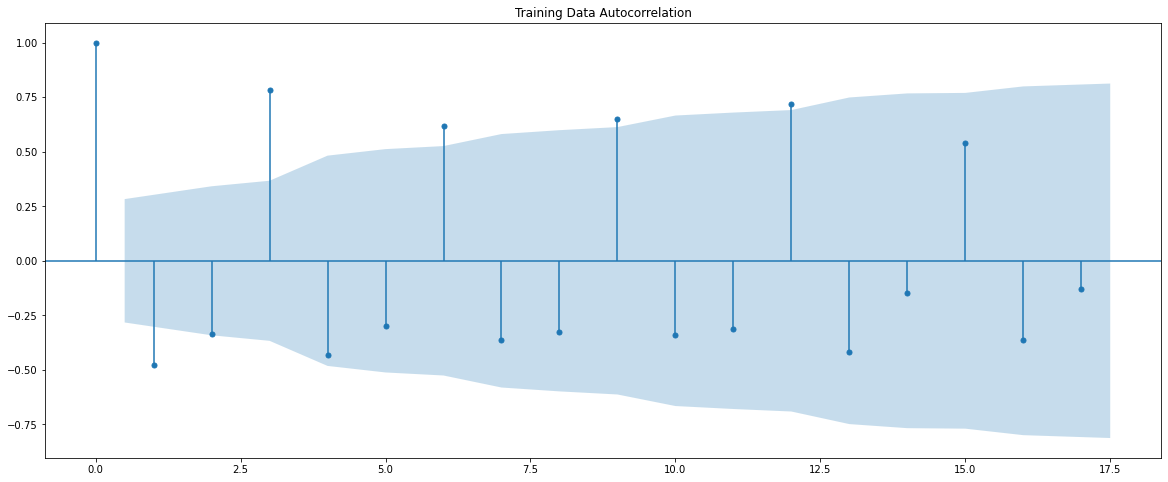

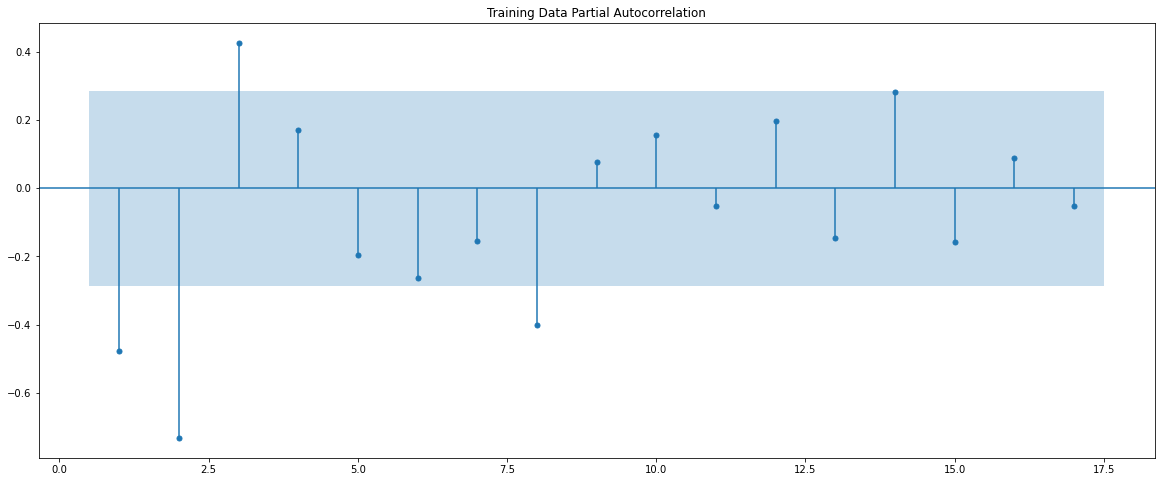

In [61]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6.
We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [62]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -229.624
Date:                           Tue, 23 Feb 2021   AIC                            479.249
Time:                                   07:53:29   BIC                            491.437
Sample:                               01-31-2015   HQIC                           482.629
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4033      2.528     -0.160      0.873      -5.358       4.552
ar.L2         -0.3966      2.539     -0.156

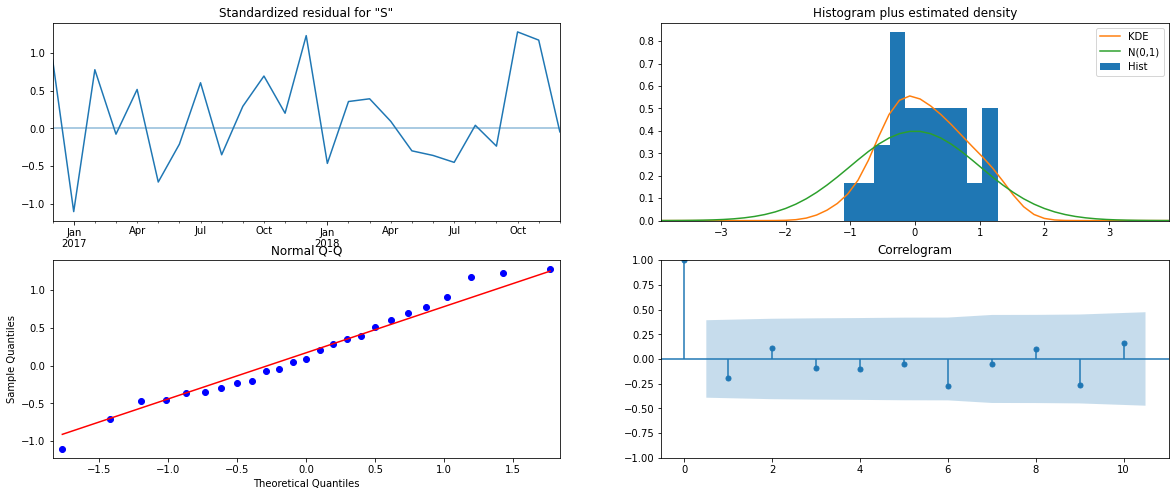

In [63]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [64]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [65]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2870.5384370887773 
MAPE: 9.367992796777662


In [66]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639
"SARIMA(1,1,3)(3,0,3,6)",2388.755767,7.939640
"SARIMA(3,1,3)(0,0,3,6)",2870.538437,9.367993


This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [147]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Netprofit'],
                                order=(0,0,0),
                                seasonal_order=(3, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                SARIMAX Results                                
Dep. Variable:               Netprofit   No. Observations:                   29
Model:             SARIMAX(3, 1, 0, 6)   Log Likelihood                 -56.243
Date:                 Sun, 28 Aug 2022   AIC                            120.486
Time:                         13:28:33   BIC                            118.924
Sample:                     03-31-2015   HQIC                           116.293
                          - 03-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.3956      0.857     -0.461      0.645      -2.076       1.285
ar.S.L12       0.5029      1.764      0.285      0.776      -2.955       3.961
ar.S.L18       1.7639      5.539      0.318 

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Evaluate the model on the whole data and predict 20 months into the future (till the end of next year).

In [148]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=8)

In [153]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Netprofit,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-06-30,-17284.786096,18576.312965,-53693.690474,19124.118281
2022-09-30,-24410.074410,18576.312965,-60818.978788,11998.829968
2022-12-31,-47028.577512,18576.312965,-83437.481890,-10619.673134
2023-03-31,-42156.628667,18576.312965,-78565.533045,-5747.724290
2023-06-30,-26935.200990,18576.312965,-63344.105368,9473.703387


In [154]:
rmse = mean_squared_error(df['Netprofit'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 16539.89316003404


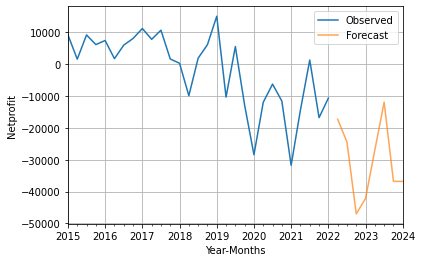

In [155]:
axis = df['Netprofit'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Netprofit')
plt.legend(loc='best')
plt.grid();

In [73]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639
"SARIMA(1,1,3)(3,0,3,6)",2388.755767,7.939640
"SARIMA(3,1,3)(0,0,3,6)",2870.538437,9.367993


# END